In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

🔍 What it does:

Loads all the key libraries for:

Data handling: pandas, numpy

Visualization: seaborn, matplotlib

Preprocessing: LabelEncoder (if categorical labels exist)

Model setup: train_test_split

Hides warnings for a cleaner output

📌 Why this is critical:
Prepares all the tools you’ll need to clean, explore, and model the dataset.

In [9]:
rd = pd.read_csv("/content/drive/MyDrive/scenario_1_daily_df.csv")
df = pd.DataFrame(rd)
df

,station_id,date,lat_x,long,x_utm,y_utm,aod_1,aod_2,aod_3,aod_4,aod_5,aod_6,aod_7,aod_8,aod_9,pm25
0,1,2018-01-01,35.750000,51.484493,543991.614039,3.961272e+06,0.145857,0.158346,0.158346,0.157065,0.154708,0.133379,0.143129,0.137310,0.137310,85.0
1,1,2018-01-01,35.750000,51.484493,543991.614039,3.961272e+06,0.176114,0.171529,0.171529,0.173543,0.173563,0.168235,0.179000,0.185229,0.185229,85.0
2,1,2018-01-01,35.750000,51.484493,543991.614039,3.961272e+06,0.145857,0.158346,0.158346,0.157065,0.154708,0.133379,0.143129,0.137310,0.137310,85.0
3,1,2018-01-01,35.750000,51.484493,543991.614039,3.961272e+06,0.176114,0.171529,0.171529,0.173543,0.173563,0.168235,0.179000,0.185229,0.185229,85.0
4,1,2018-01-01,35.750000,51.484493,543991.614039,3.961272e+06,0.145857,0.158346,0.158346,0.157065,0.154708,0.133379,0.143129,0.137310,0.137310,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261563,22,2021-09-30,35.316667,51.243519,522105.956438,3.953165e+06,0.195033,0.205967,0.204328,0.195246,0.204230,0.190590,0.196230,0.196230,0.189803,106.0
261564,22,2021-09-30,35.316667,51.243519,522105.956438,3.953165e+06,0.195033,0.205967,0.204328,0.195246,0.204230,0.190590,0.196230,0.196230,0.189803,106.0
261565,22,2021-09-30,35.316667,51.243519,522105.956438,3.953165e+06,0.195033,0.205967,0.204328,0.195246,0.204230,0.190590,0.196230,0.196230,0.189803,106.0
261566,22,2021-09-30,35.316667,51.243519,522105.956438,3.953165e+06,0.195033,0.205967,0.204328,0.195246,0.204230,0.190590,0.196230,0.196230,0.189803,106.0


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


🔍 What it does:

Reads the CSV file from Google Drive.

Converts it to a pandas DataFrame (though this step is redundant since read_csv already returns a DataFrame).

📌 Why this is critical:
It brings your air quality dataset into memory to be cleaned and analyzed.

🔍 What it does:
Connects your Google Drive to the Colab notebook so you can read files stored there.

In [11]:
df_subset = df[df['station_id'] == 1]

df_subset

,station_id,date,lat_x,long,x_utm,y_utm,aod_1,aod_2,aod_3,aod_4,aod_5,aod_6,aod_7,aod_8,aod_9,pm25
0,1,2018-01-01,35.75,51.484493,543991.614039,3.961272e+06,0.145857,0.158346,0.158346,0.157065,0.154708,0.133379,0.143129,0.137310,0.137310,85.000000
1,1,2018-01-01,35.75,51.484493,543991.614039,3.961272e+06,0.176114,0.171529,0.171529,0.173543,0.173563,0.168235,0.179000,0.185229,0.185229,85.000000
2,1,2018-01-01,35.75,51.484493,543991.614039,3.961272e+06,0.145857,0.158346,0.158346,0.157065,0.154708,0.133379,0.143129,0.137310,0.137310,85.000000
3,1,2018-01-01,35.75,51.484493,543991.614039,3.961272e+06,0.176114,0.171529,0.171529,0.173543,0.173563,0.168235,0.179000,0.185229,0.185229,85.000000
4,1,2018-01-01,35.75,51.484493,543991.614039,3.961272e+06,0.145857,0.158346,0.158346,0.157065,0.154708,0.133379,0.143129,0.137310,0.137310,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14455,1,2021-09-30,35.75,51.484493,543991.614039,3.961272e+06,0.158730,0.148950,0.148950,0.157032,0.158548,0.152159,0.155905,0.151746,0.151746,71.956566
14456,1,2021-09-30,35.75,51.484493,543991.614039,3.961272e+06,0.158730,0.148950,0.148950,0.157032,0.158548,0.152159,0.155905,0.151746,0.151746,71.955030
14457,1,2021-09-30,35.75,51.484493,543991.614039,3.961272e+06,0.158730,0.148950,0.148950,0.157032,0.158548,0.152159,0.155905,0.151746,0.151746,71.953494
14458,1,2021-09-30,35.75,51.484493,543991.614039,3.961272e+06,0.158730,0.148950,0.148950,0.157032,0.158548,0.152159,0.155905,0.151746,0.151746,71.951958


🔍 What it does:
Filters the full dataset for only the records where station_id == 1.

📌 Why this is critical:
This narrows the scope of analysis to one air quality monitoring station, which makes the modeling more focused.

In [12]:
df_subset.describe()

,station_id,lat_x,long,x_utm,y_utm,aod_1,aod_2,aod_3,aod_4,aod_5,aod_6,aod_7,aod_8,aod_9,pm25
count,14460.0,14460.00,1.446000e+04,1.446000e+04,1.446000e+04,14460.000000,14460.000000,14460.000000,14460.000000,14460.000000,14460.000000,14460.000000,14460.000000,14460.000000,14460.000000
mean,1.0,35.75,5.148449e+01,5.439916e+05,3.961272e+06,0.180721,0.191387,0.191387,0.192562,0.191911,0.179784,0.187967,0.185866,0.185866,81.165897
std,0.0,0.00,1.307444e-11,7.450838e-08,1.312745e-06,0.046783,0.048475,0.048475,0.052644,0.044012,0.040190,0.038078,0.043433,0.043433,4.319551
min,1.0,35.75,5.148449e+01,5.439916e+05,3.961272e+06,0.055000,0.095000,0.095000,0.119176,0.125439,0.122071,0.118857,0.128029,0.128029,71.950422
25%,1.0,35.75,5.148449e+01,5.439916e+05,3.961272e+06,0.149400,0.158346,0.158346,0.150300,0.158349,0.150800,0.160727,0.154552,0.154552,77.502560
50%,1.0,35.75,5.148449e+01,5.439916e+05,3.961272e+06,0.166111,0.179412,0.179412,0.183478,0.182474,0.171087,0.187829,0.175708,0.175708,83.054697
75%,1.0,35.75,5.148449e+01,5.439916e+05,3.961272e+06,0.210357,0.217156,0.217156,0.219458,0.217000,0.216863,0.215500,0.221143,0.221143,85.000000
max,1.0,35.75,5.148449e+01,5.439916e+05,3.961272e+06,0.310000,0.336000,0.336000,0.340000,0.330000,0.270000,0.265643,0.312000,0.312000,85.000000


🔍 What it does:
Shows summary statistics (mean, std, min, max, etc.) for each numeric column.

📌 Why this is critical:
This gives you a first overview of the values and possible outliers or scales in your features.

In [13]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14460 entries, 0 to 14459
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station_id  14460 non-null  int64  
 1   date        14460 non-null  object 
 2   lat_x       14460 non-null  float64
 3   long        14460 non-null  float64
 4   x_utm       14460 non-null  float64
 5   y_utm       14460 non-null  float64
 6   aod_1       14460 non-null  float64
 7   aod_2       14460 non-null  float64
 8   aod_3       14460 non-null  float64
 9   aod_4       14460 non-null  float64
 10  aod_5       14460 non-null  float64
 11  aod_6       14460 non-null  float64
 12  aod_7       14460 non-null  float64
 13  aod_8       14460 non-null  float64
 14  aod_9       14460 non-null  float64
 15  pm25        14460 non-null  float64
dtypes: float64(14), int64(1), object(1)
memory usage: 2.4+ MB


🔍 What it does:
Prints column names, non-null counts, and data types.

📌 Why this is critical:
Helps identify missing values and confirm if columns have the right data types (float, int, object).

In [14]:
df_subset.drop(columns=['date', 'station_id', 'lat_x', 'long', 'x_utm', 'y_utm'], inplace=True)

🔍 What it does:
Removes columns not useful for modeling.

📌 Why this is critical:
These columns either:

Contain constant values (station_id)

Are geographic (lat_x, long) already embedded

Are not directly informative for predicting pm25

In [15]:
df.drop(columns=['date', 'station_id', 'lat_x', 'long', 'x_utm', 'y_utm'], inplace=True)

🔍 What it does:
Does the same cleaning for the full dataset.

In [16]:
df_subset.dropna(inplace=True)
df_subset.drop_duplicates(inplace=True)

🔍 What it does:

Removes rows with any missing values.

Removes repeated rows.

📌 Why this is critical:
Missing or duplicate data can distort the model and evaluation metrics.

In [17]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

🔍 What it does:
Cleans the full dataset similarly.

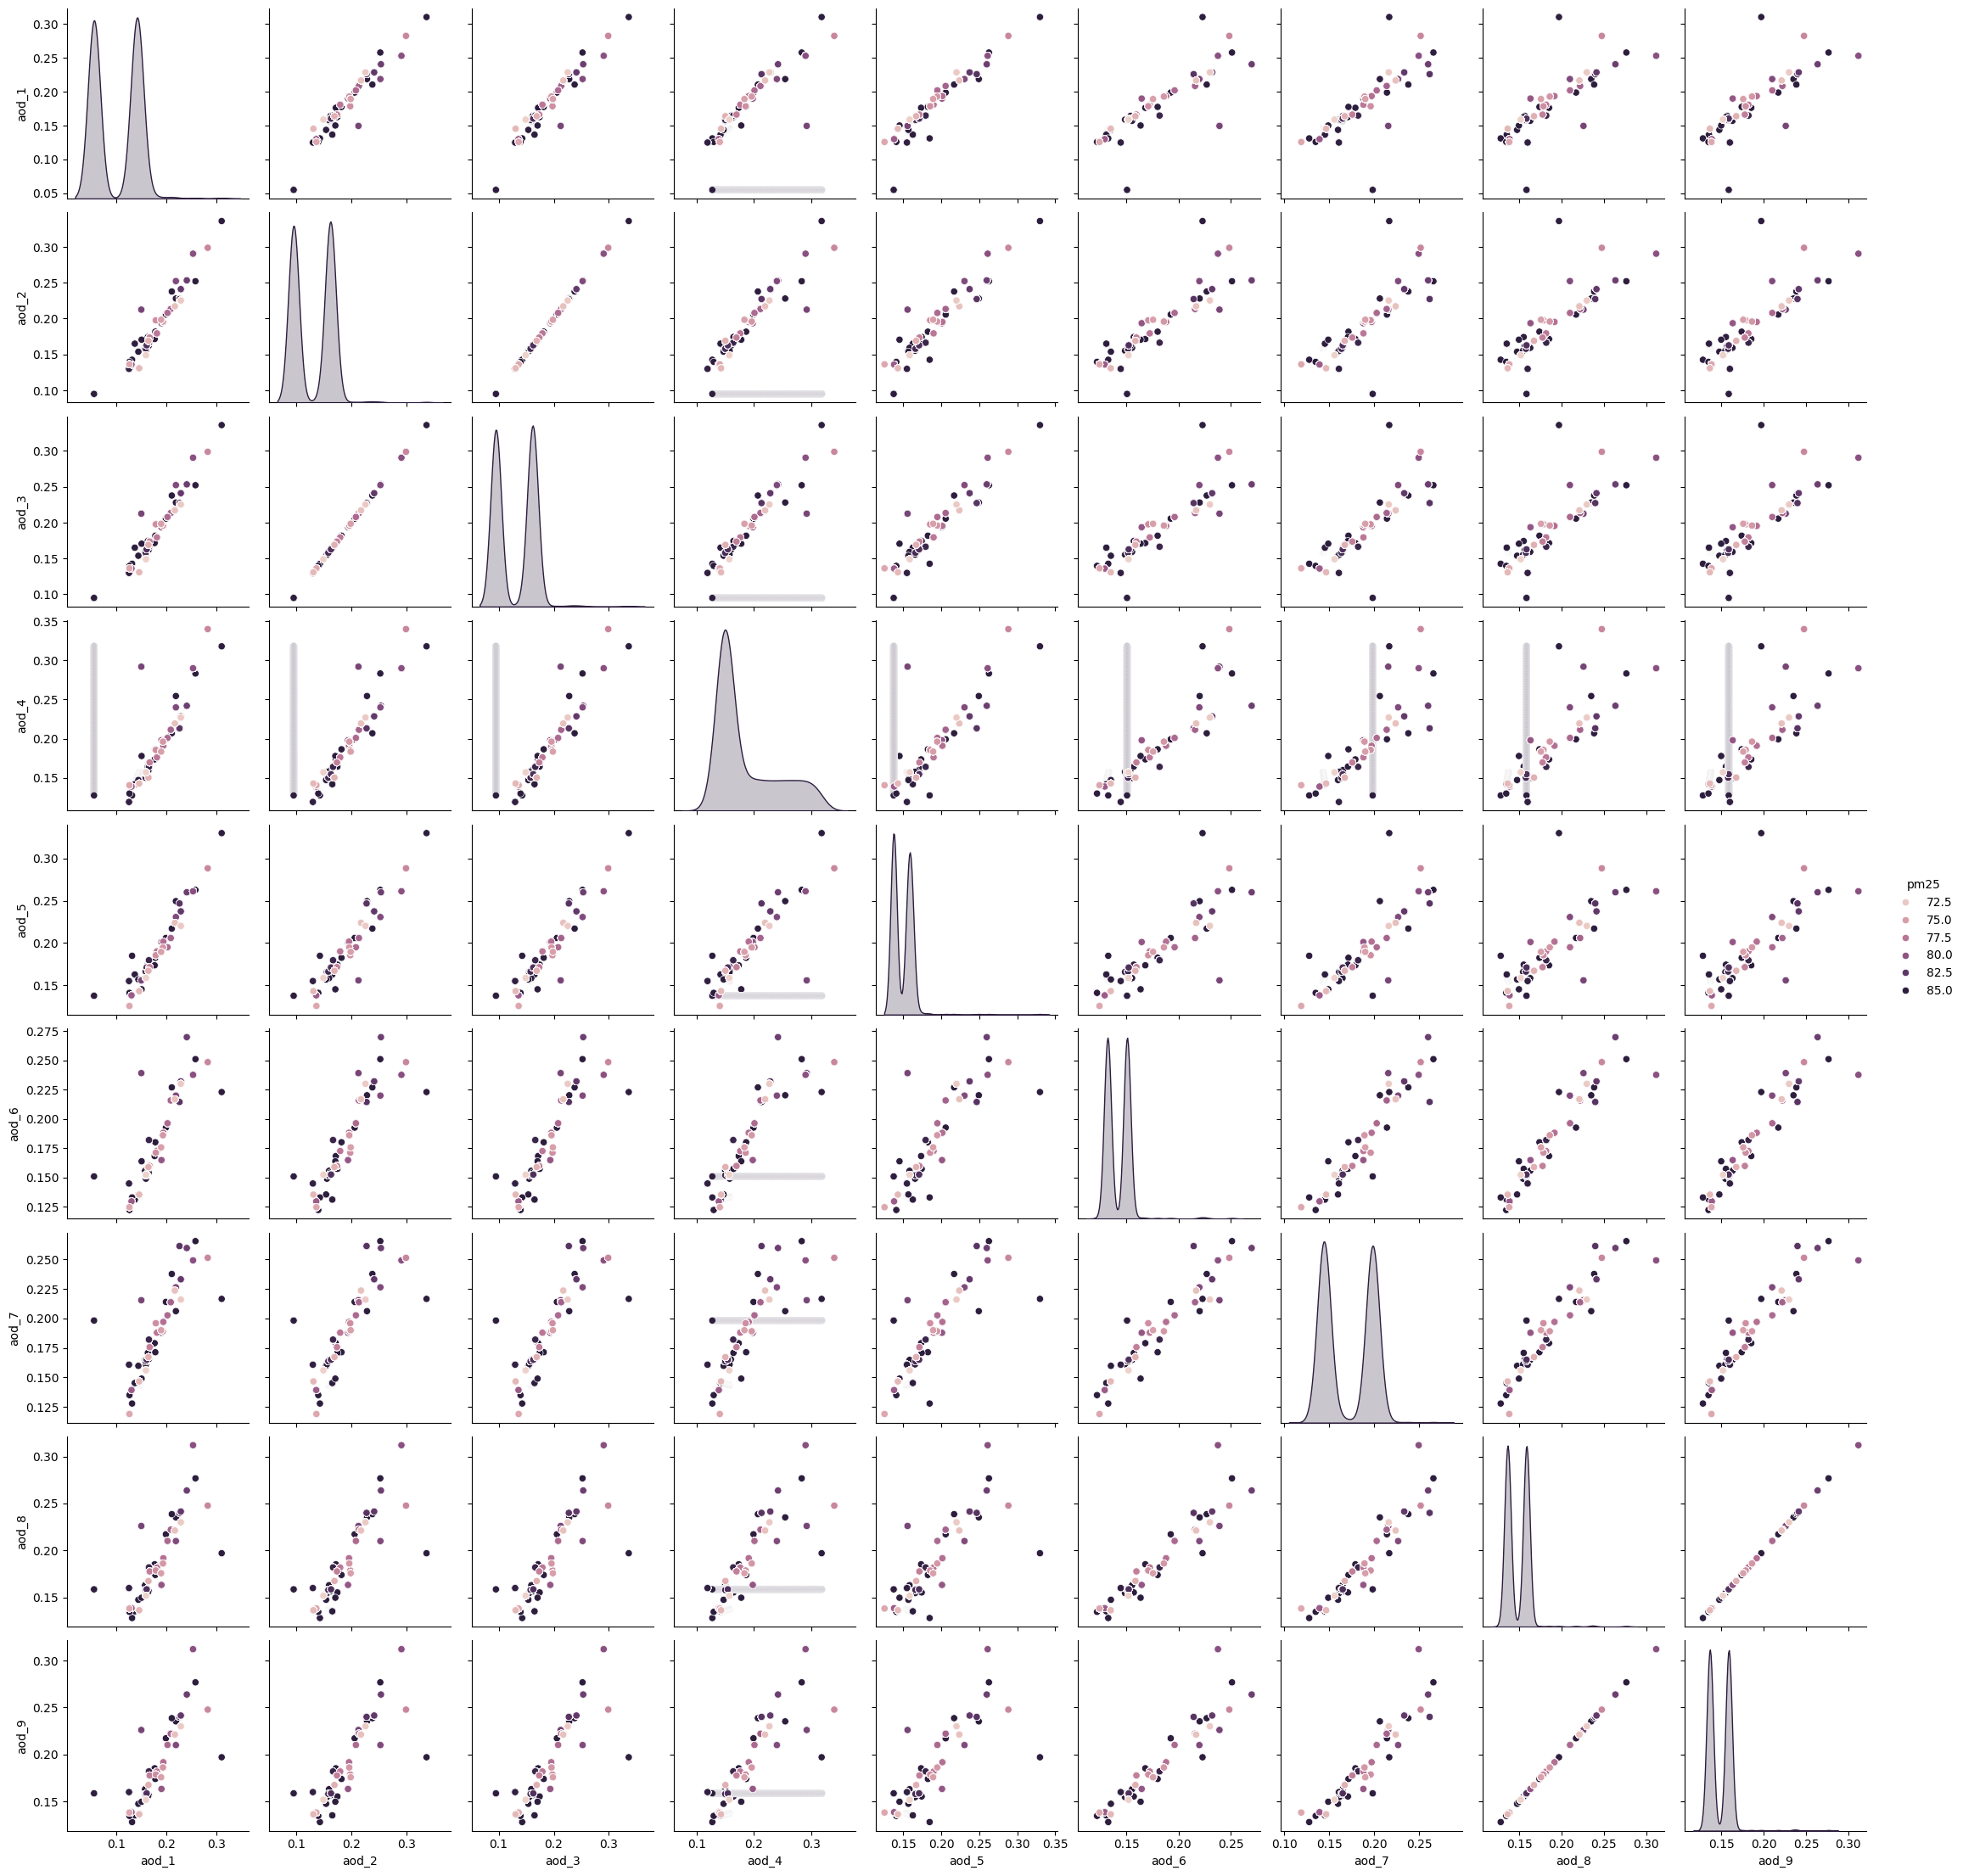

In [18]:
sns.pairplot(df_subset, hue='pm25')
plt.savefig('pairplot.png')
plt.show()

🔍 What it does:
Creates a grid of scatterplots between each pair of features, color-coded by pm25.

📌 Why this is critical:
It visually shows:

Correlations

Patterns or clusters

Non-linear relationships

Outliers

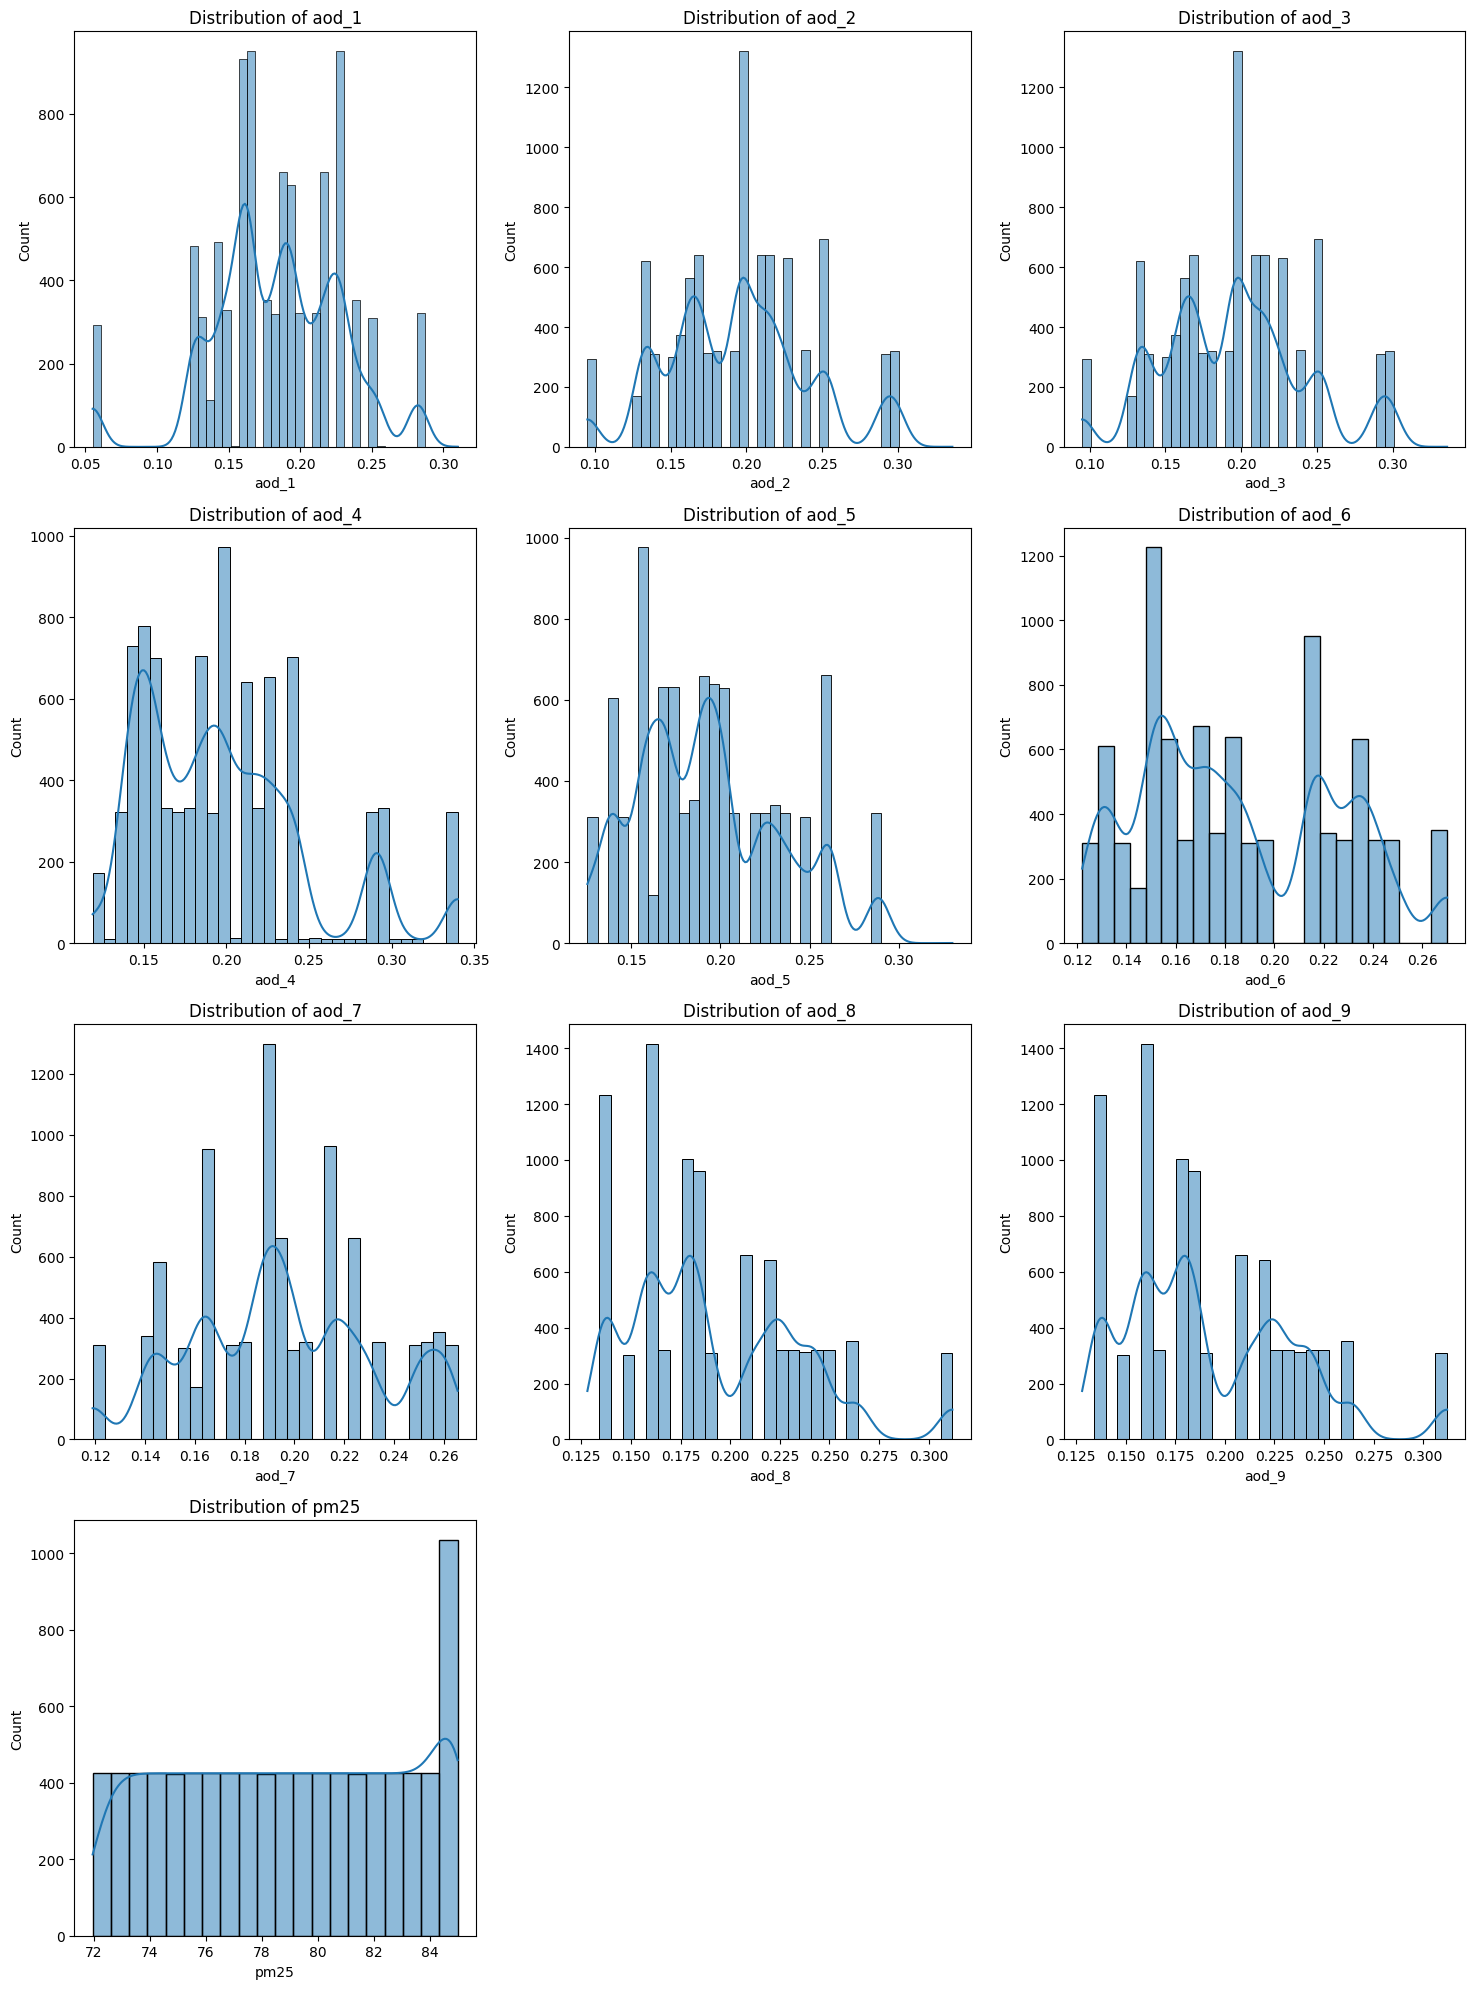

In [19]:
numeric_columns = df_subset.select_dtypes(include=['number']).columns

n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.histplot(df_subset[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

if len(numeric_columns) < len(axes):
    for j in range(len(numeric_columns), len(axes)):
        axes[j].set_visible(False)


plt.tight_layout()
plt.savefig('numeric_columns_distribution.png')
plt.show()

🔍 What it does:

Creates a histogram + KDE (smooth curve) for each numeric feature.

Helps assess the distribution shape (normal, skewed, bimodal).

📌 Why this is critical:
Many models assume normally distributed input data. These plots help guide transformations (e.g., log, square root) or normalization.

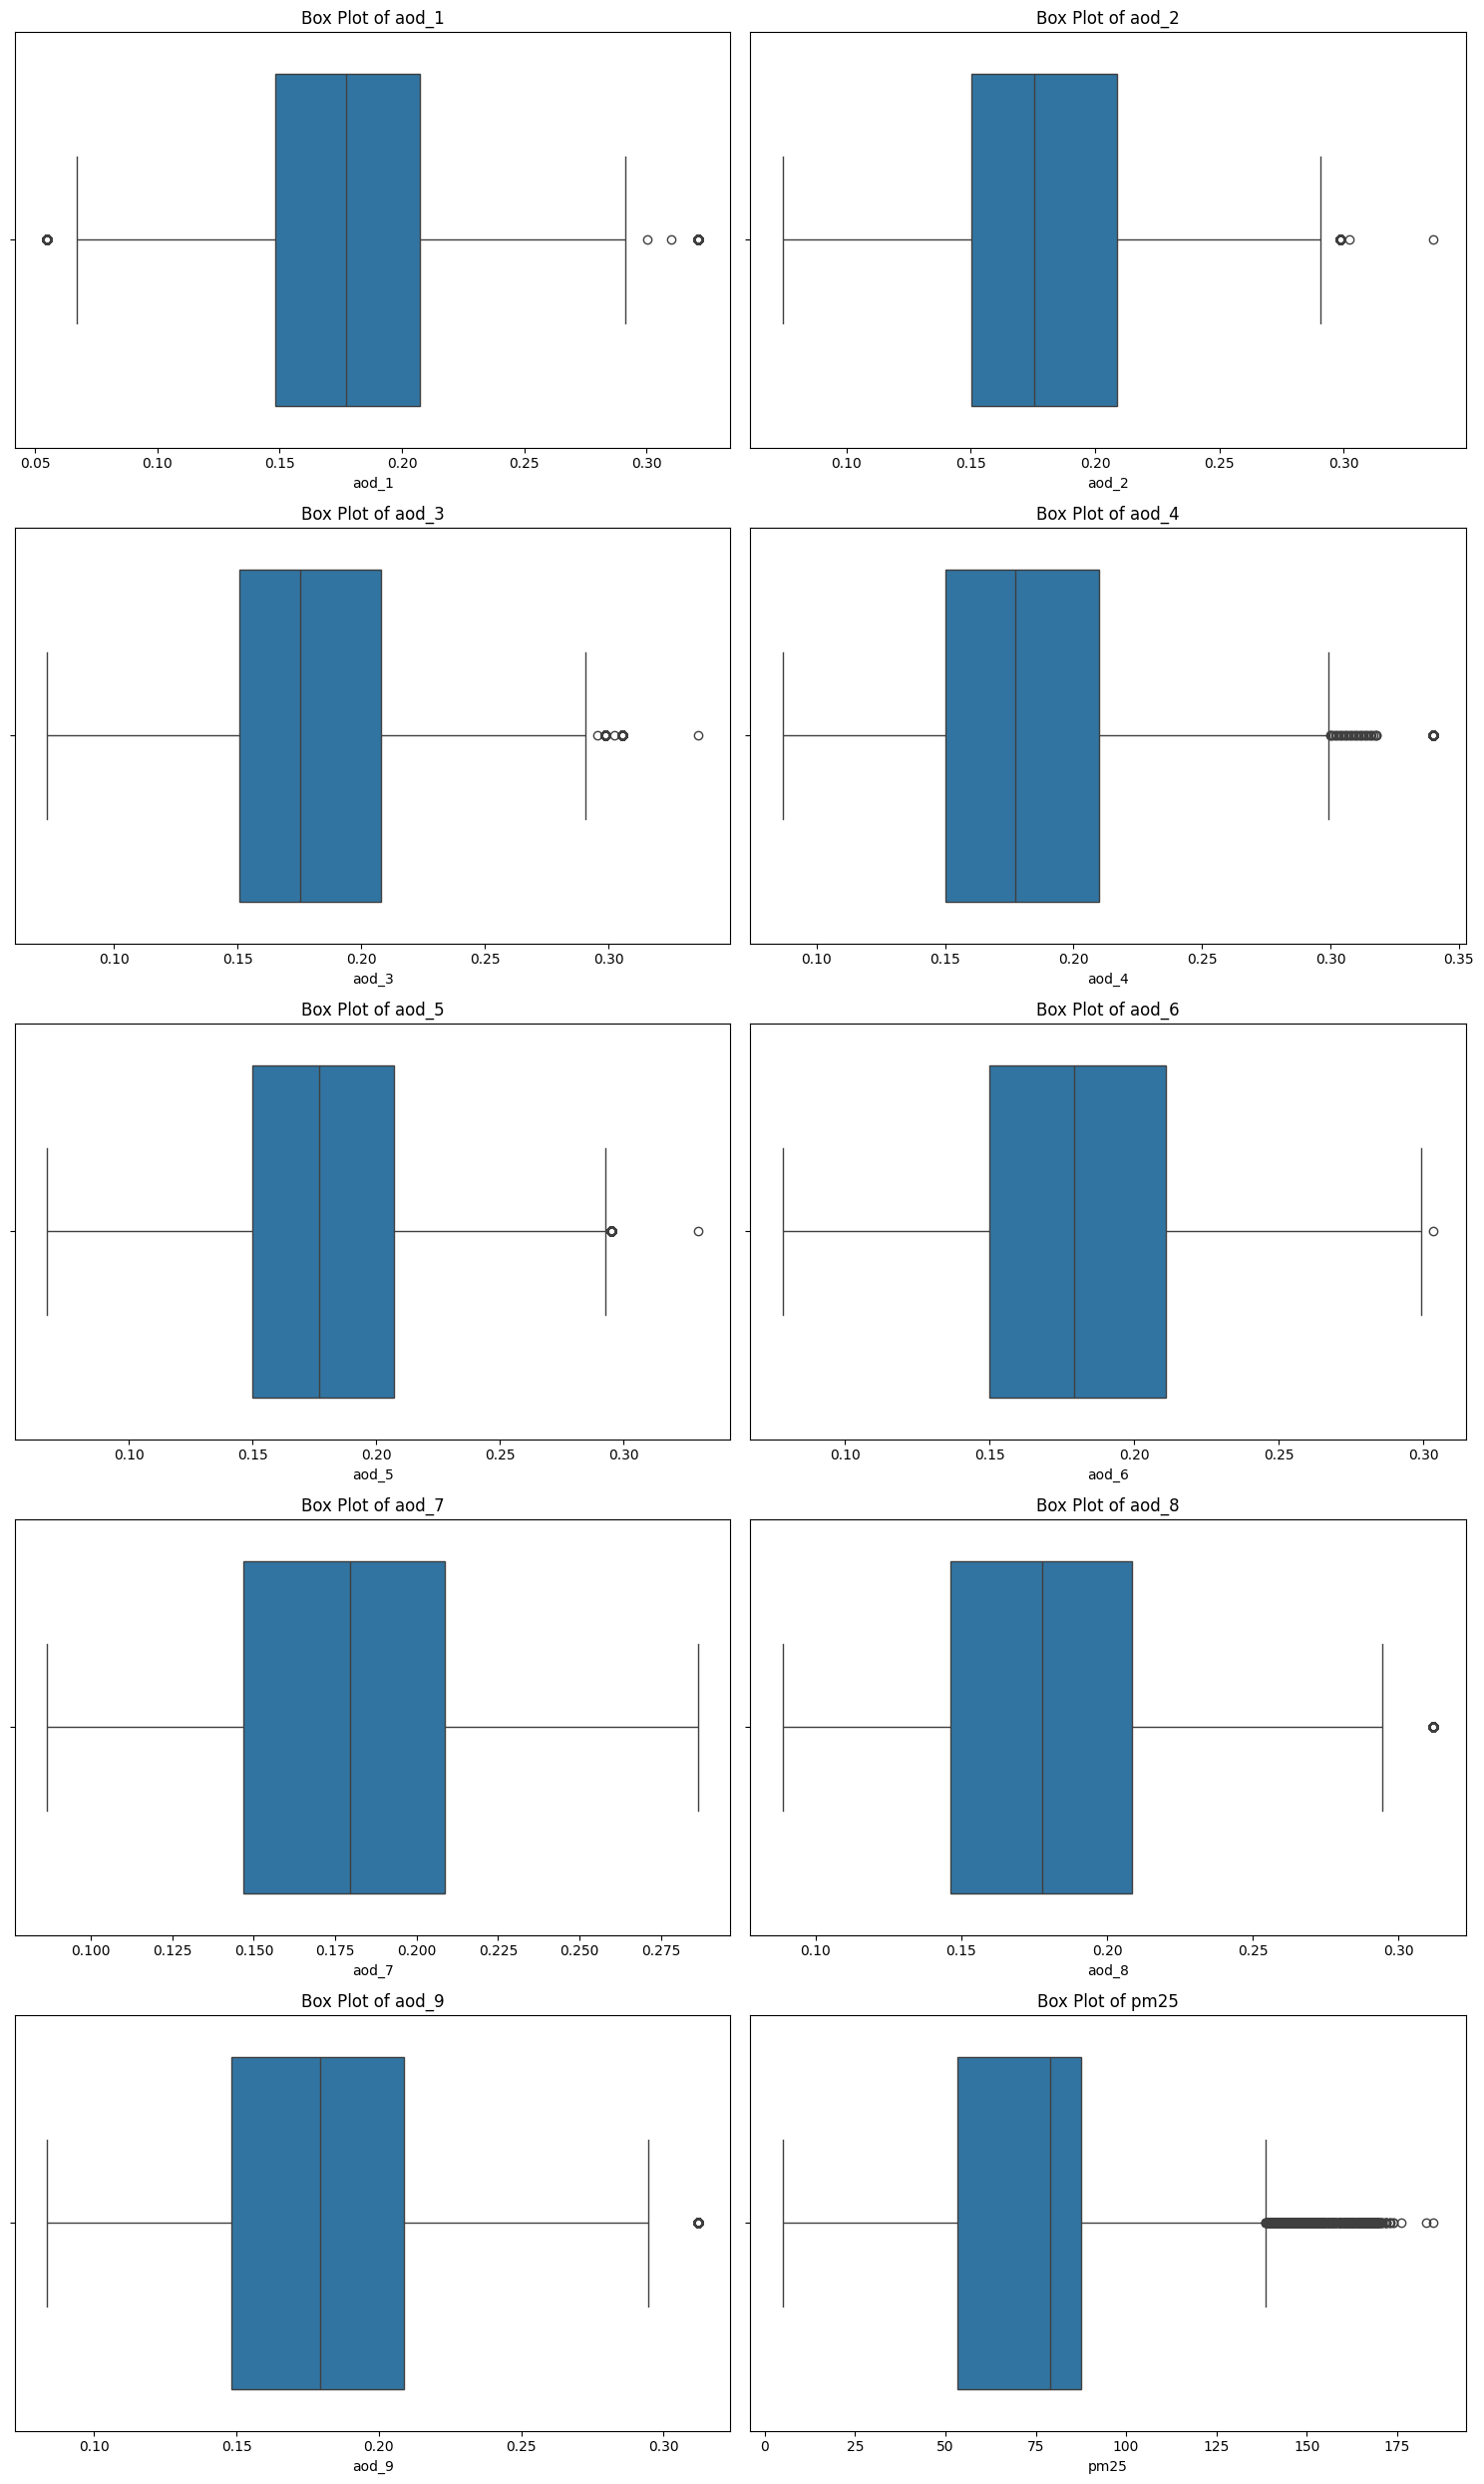

In [20]:
n_cols = 2
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')

if len(numeric_columns) < len(axes):
    for j in range(len(numeric_columns), len(axes)):
        axes[j].set_visible(False)

plt.tight_layout()
plt.savefig('numeric_columns_boxplots.png')
plt.show()

🔍 What it does:
Shows outliers, median, and IQR (interquartile range) for each numeric feature.

📌 Why this is critical:

Reveals extreme values that might affect regression.

Helps decide on outlier removal or robust scaling.

In [21]:
corr = df_subset.corr()

corr

,aod_1,aod_2,aod_3,aod_4,aod_5,aod_6,aod_7,aod_8,aod_9,pm25
aod_1,1.000000,0.940942,0.940942,0.628468,0.940205,0.803049,0.762642,0.803589,0.803589,-0.177764
aod_2,0.940942,1.000000,1.000000,0.799905,0.931345,0.889725,0.847554,0.892109,0.892109,-0.037890
aod_3,0.940942,1.000000,1.000000,0.799905,0.931345,0.889725,0.847554,0.892109,0.892109,-0.037890
aod_4,0.628468,0.799905,0.799905,1.000000,0.726317,0.841244,0.824265,0.811023,0.811023,0.055382
aod_5,0.940205,0.931345,0.931345,0.726317,1.000000,0.853803,0.892079,0.862260,0.862260,0.026223
aod_6,0.803049,0.889725,0.889725,0.841244,0.853803,1.000000,0.930854,0.936665,0.936665,0.052422
aod_7,0.762642,0.847554,0.847554,0.824265,0.892079,0.930854,1.000000,0.918301,0.918301,0.153739
aod_8,0.803589,0.892109,0.892109,0.811023,0.862260,0.936665,0.918301,1.000000,1.000000,0.081081
aod_9,0.803589,0.892109,0.892109,0.811023,0.862260,0.936665,0.918301,1.000000,1.000000,0.081081
pm25,-0.177764,-0.037890,-0.037890,0.055382,0.026223,0.052422,0.153739,0.081081,0.081081,1.000000


🔍 What it does:
Calculates the Pearson correlation coefficient between all pairs of numeric columns in df_subset.

📌 Why this is critical:

Detects linear relationships between features.

Helps identify multicollinearity (two features too similar).

Useful for feature selection or transformation.

In [22]:
mask = np.triu(np.ones_like(corr, dtype=bool))

🔍 What it does:
Creates a boolean mask to hide the upper triangle of the symmetric correlation matrix.

📌 Why this is critical:

Prevents duplicate information in the heatmap.

Makes visualization cleaner and easier to read.



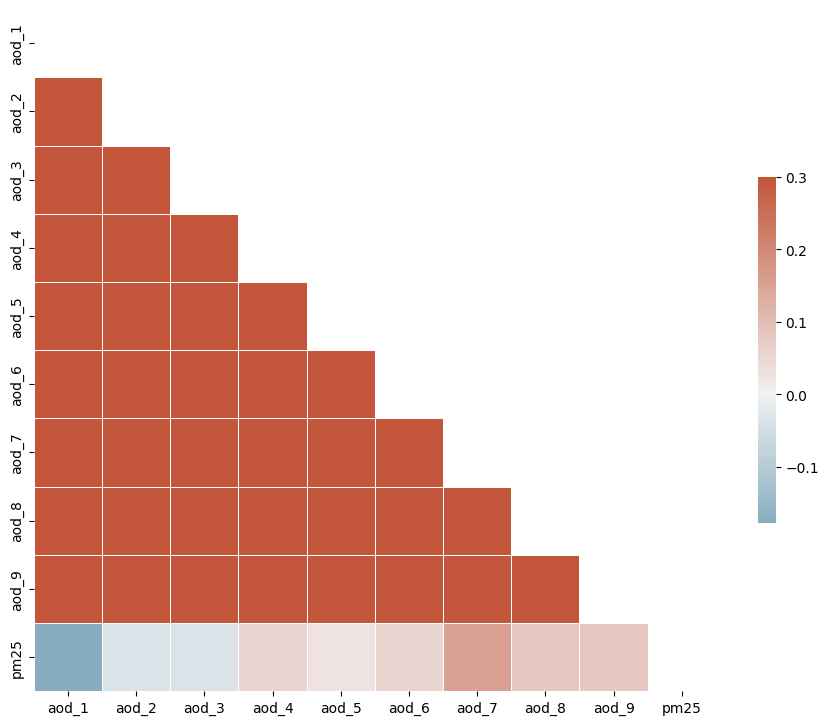

In [23]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

🔍 What it does:
Draws a heatmap of the correlation matrix with a color gradient:

vmax=0.3: Limits max color intensity.

center=0: Neutral color at zero correlation.

diverging_palette(230, 20): Uses a blue-red color scale.

📌 Why this is critical:

Visualizes how strongly features are related.

Highlights pairs with strong correlation (positive or negative).

Too much correlation can harm models like linear regression due to multicollinearity.

#split

# Data Preprocessing

In [24]:
x = df.iloc[:, :-1]
x

,aod_1,aod_2,aod_3,aod_4,aod_5,aod_6,aod_7,aod_8,aod_9
0,0.145857,0.158346,0.158346,0.157065,0.154708,0.133379,0.143129,0.137310,0.137310
1,0.176114,0.171529,0.171529,0.173543,0.173563,0.168235,0.179000,0.185229,0.185229
373,0.145826,0.158369,0.158369,0.157014,0.154735,0.133371,0.143136,0.137303,0.137303
374,0.145795,0.158391,0.158391,0.156963,0.154762,0.133363,0.143143,0.137296,0.137296
375,0.145763,0.158413,0.158413,0.156912,0.154788,0.133355,0.143149,0.137289,0.137289
...,...,...,...,...,...,...,...,...,...
259989,0.160590,0.193256,0.174950,0.151538,0.169432,0.169225,0.173412,0.173412,0.160622
260309,0.162845,0.176586,0.171579,0.154525,0.174750,0.154621,0.173042,0.173042,0.165510
260619,0.259440,0.274000,0.265377,0.248804,0.268078,0.260596,0.255644,0.255644,0.252980
260939,0.256286,0.267294,0.258849,0.252327,0.269852,0.252442,0.249085,0.249085,0.252872


🔍 What it does:
Selects all columns except the last one from the cleaned df as feature variables.

📌 Why this is critical:
This matrix will be used as input to train your models.

In [25]:
y = df.iloc[:, -1]
y

,pm25
0,85.0
1,85.0
373,85.0
374,85.0
375,85.0
...,...
259989,106.0
260309,106.0
260619,106.0
260939,106.0


🔍 What it does:
Selects the last column from df as the target variable (pm25 most likely).

📌 Why this is critical:
This is the variable your model will try to predict (the output).

In [26]:
from sklearn.preprocessing import StandardScaler

🔍 What it does:
Brings in the tool to standardize features (mean=0, std=1).

📌 Why this is critical:

Required for many models like KNN and regression.

Prevents features with large ranges from dominating.

In [27]:
scaler = StandardScaler()

🔍 What it does:
Initializes the scaler object without applying it yet.

In [28]:
x_subset_scaled = scaler.fit_transform(x)

🔍 What it does:

Learns the mean and standard deviation from x (fit)

Applies the transformation to scale each column (transform)

📌 Why this is critical:
Ensures that each feature contributes equally to the distance and error calculations in models.

In [29]:
from sklearn.model_selection import train_test_split

🔍 What it does:
Imports the method to randomly split data into training and test sets.

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_subset_scaled, y, train_size=0.2, random_state=42)

🔍 What it does:

Splits the dataset so that 20% is for training, and 80% is for testing.

random_state=42 ensures the result is reproducible.

📌 Why this is critical:
Models are trained on one part of the data and tested on another to evaluate generalization.

⚠️ train_size=0.2 means only 20% is used for training, which is unusual. Most use train_size=0.8. Consider flipping this unless intentional.

# Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score


🔍 What it does:

Brings in the linear regression model.

Imports tools to evaluate model performance.

📌 Why this is critical:
These tools allow you to build and assess how well your model predicts the target.

In [32]:
lr = LinearRegression()

🔍 What it does:
Creates an instance of the Linear Regression model using default parameters.

In [33]:
lr.fit(x_train, y_train)
y_pred_test_lr = lr.predict(x_test)
y_pred_train_lr = lr.predict(x_train)

🔍 What it does:

Trains the model on the training data.

Predicts outcomes for both test and training sets.

📌 Why this is critical:
You need both training and test predictions to measure:

Training performance (how well model fits data)

Testing performance (how well model generalizes)



In [34]:
print(f"The Mean Squared Error of Test data with Linear regression is {mean_squared_error(y_pred_test_lr, y_test)}")
print(f"The Mean Absolute Error of Test data with Linear regression is {mean_absolute_error(y_pred_test_lr, y_test)}")
print(f"The Root Mean Squared Error of Test data with Linear regression is {root_mean_squared_error(y_pred_test_lr, y_test)}")
print(f"\nThe R2 Score Test data with Linear regression is {r2_score(y_pred_test_lr, y_test)}")

The Mean Squared Error of Test data with Linear regression is 497.8229103790858
The Mean Absolute Error of Test data with Linear regression is 17.531575149318854
The Root Mean Squared Error of Test data with Linear regression is 22.311945463788803

The R2 Score Test data with Linear regression is -18.216425611134426


🔍 What it does:
Prints four metrics that help evaluate model accuracy on the test set.

📌 Explanation of each metric:

MSE (Mean Squared Error): Penalizes large errors more heavily.

MAE (Mean Absolute Error): Average magnitude of errors (linear penalty).

RMSE (Root MSE): More interpretable than MSE (same units as target).

R² Score: Measures how well the model explains the variance in the data (1 = perfect, 0 = mean model).

➡️ Same metrics are printed for training set as well in step 2. Comparing train vs test helps detect:

Overfitting: High train performance, low test performance.

Underfitting: Both train and test perform poorly.

In [35]:
print(f"The Mean Squared Error of Train data with Linear regression is {mean_squared_error(y_pred_train_lr, y_train)}")
print(f"The Mean Absolute Error of Train data with Linear regression is {mean_absolute_error(y_pred_train_lr, y_train)}")
print(f"The Root Mean Squared Error of Train data with Linear regression is {root_mean_squared_error(y_pred_train_lr, y_train)}")
print(f"\nThe R2 Score Train data with Linear regression is {r2_score(y_pred_train_lr, y_train)}")

The Mean Squared Error of Train data with Linear regression is 494.72525733360897
The Mean Absolute Error of Train data with Linear regression is 17.443821307596085
The Root Mean Squared Error of Train data with Linear regression is 22.242420222035392

The R2 Score Train data with Linear regression is -18.34882245377549


🔍 What it does:
Prints four metrics that help evaluate model accuracy on the test set.

📌 Explanation of each metric:

MSE (Mean Squared Error): Penalizes large errors more heavily.

MAE (Mean Absolute Error): Average magnitude of errors (linear penalty).

RMSE (Root MSE): More interpretable than MSE (same units as target).

R² Score: Measures how well the model explains the variance in the data (1 = perfect, 0 = mean model).

➡️ Same metrics are printed for training set as well in step 2. Comparing train vs test helps detect:

Overfitting: High train performance, low test performance.

Underfitting: Both train and test perform poorly.

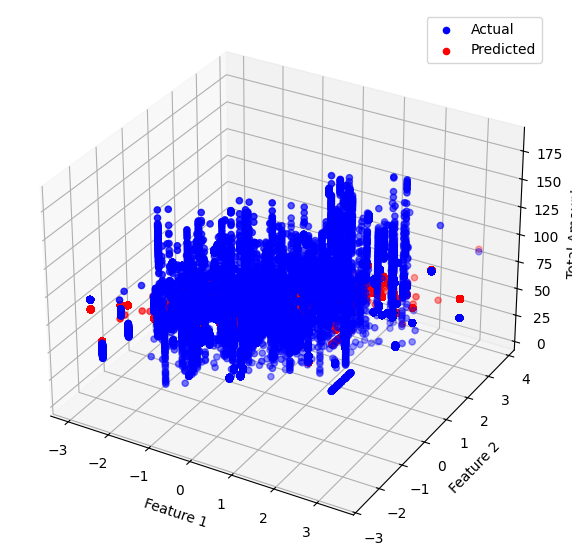

In [36]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual values
ax.scatter(x_test[:, 0], x_test[:, 1], y_test, color='blue', label='Actual')

# Predicted values
ax.scatter(x_test[:, 0], x_test[:, 1], y_pred_test_lr, color='red', label='Predicted')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Total Amount')
ax.legend()
plt.show()

🔍 What it does:
Creates a 3D plot with two selected features (x_test[:, 0], x_test[:, 1]) and:

Actual PM2.5 values in blue.

Predicted values in red.

📌 Why this is useful:
Visual comparison of predicted vs actual values to see:

Whether the model is learning the shape of the data.

How close the red points (prediction) are to blue (real).

⚠️ This only works if you have at least two features to visualize!

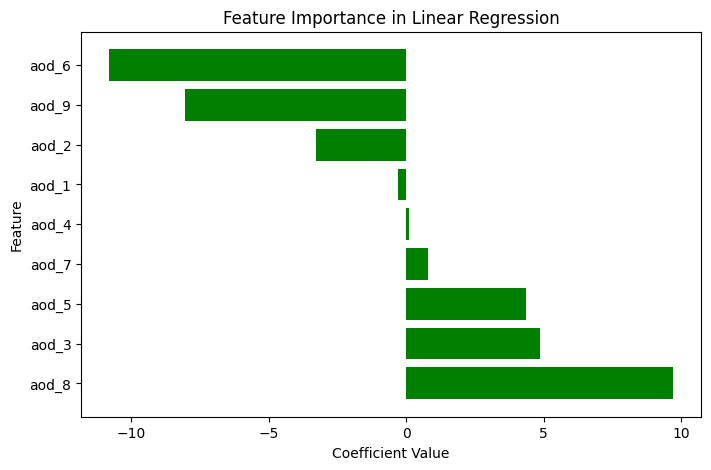

In [37]:
coefs = pd.DataFrame({'Feature': x.columns, 'Coefficient': lr.coef_})
coefs = coefs.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(coefs['Feature'], coefs['Coefficient'], color='green')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Linear Regression')
plt.show()

🔍 What it does:
Visualizes how much each feature contributes to predictions via model coefficients.

📌 Why this is critical:

Shows feature importance in a linear model.

Large positive/negative values = strong effect.

Zero/near-zero values = minimal contribution.

# Ridge

In [38]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}


🔍 What it does:

Sets up Ridge Regression, which includes L2 regularization.

Uses GridSearchCV to test different alpha values (regularization strength).

Smaller alpha = behaves like linear regression.

Larger alpha = more regularization = simpler model.

📌 Why this is critical:
Ridge helps reduce overfitting by penalizing large coefficients.



In [40]:
ridge_reg = Ridge()

In [41]:
grid_search = GridSearchCV(ridge_reg, param_grid, cv=3, scoring='neg_mean_squared_error')

In [42]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

In [43]:
print("Best alpha:", grid_search.best_params_['alpha'])

Best alpha: 10.0


In [44]:
best_ridge = Ridge(alpha=10.0)

In [45]:
best_ridge.fit(x_train, y_train)
y_pred_train_ridge = best_ridge.predict(x_train)
y_pred_test_ridge = best_ridge.predict(x_test)

🔍 What it does:

Fits all Ridge models with different alpha values.

Picks the one with lowest mean squared error on validation set.

In [46]:
print(f"The Mean Squared Error of Test data with Ridge regression is {mean_squared_error(y_pred_test_ridge, y_test)}")
print(f"The Mean Absolute Error of Test data with Ridge regression is {mean_absolute_error(y_pred_test_ridge, y_test)}")
print(f"The Root Mean Squared Error of Test data with Ridge regression is {root_mean_squared_error(y_pred_test_ridge, y_test)}")
print(f"\nThe R2 Score Test data with Ridge regression is {r2_score(y_pred_test_ridge, y_test)}")

The Mean Squared Error of Test data with Ridge regression is 497.8296145636351
The Mean Absolute Error of Test data with Ridge regression is 17.53146148163069
The Root Mean Squared Error of Test data with Ridge regression is 22.31209570084431

The R2 Score Test data with Ridge regression is -18.46444317865475


🔍 What it does:

Initializes Ridge with the chosen alpha.

Trains and predicts on both train and test sets (same as in linear regression step).

In [47]:
print(f"The Mean Squared Error of Train data with Ridge regression is {mean_squared_error(y_pred_train_ridge, y_train)}")
print(f"The Mean Absolute Error of Train data with Ridge regression is {mean_absolute_error(y_pred_train_ridge, y_train)}")
print(f"The Root Mean Squared Error of Train data with Ridge regression is {root_mean_squared_error(y_pred_train_ridge, y_train)}")
print(f"\nThe R2 Score Train data with Ridge regression is {r2_score(y_pred_train_ridge, y_train)}")

The Mean Squared Error of Train data with Ridge regression is 494.7269546111838
The Mean Absolute Error of Train data with Ridge regression is 17.44364454924201
The Root Mean Squared Error of Train data with Ridge regression is 22.24245837606949

The R2 Score Train data with Ridge regression is -18.60049776286248


🔍 What it does:
Same metrics as before, but now for Ridge regression on the test set.

📌 Compare this with the linear regression performance. If Ridge performs better or more stably, it likely reduced overfitting.

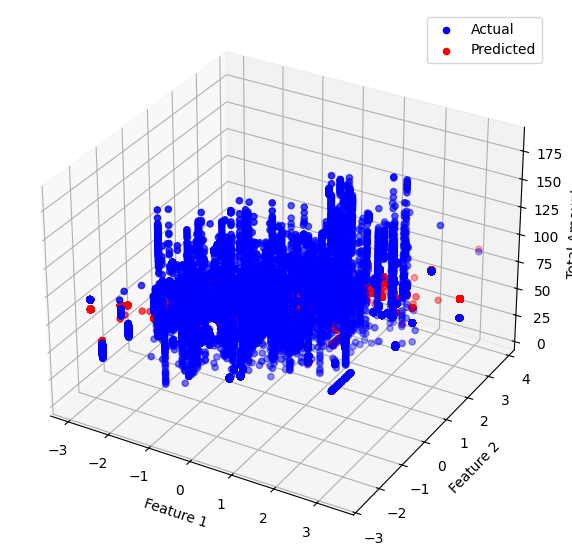

In [48]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual values
ax.scatter(x_test[:, 0], x_test[:, 1], y_test, color='blue', label='Actual')

# Predicted values
ax.scatter(x_test[:, 0], x_test[:, 1], y_pred_test_ridge, color='red', label='Predicted')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Total Amount')
ax.legend()
plt.show()

🔍 What it does:
Same idea as linear regression 3D plot, but now for Ridge predictions.

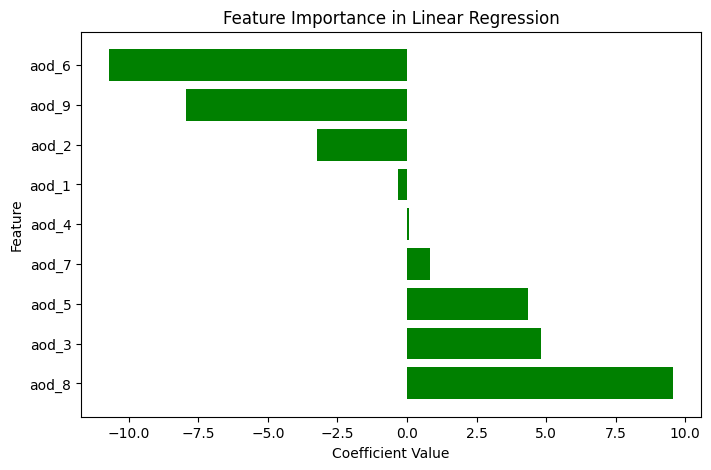

In [49]:
coefs = pd.DataFrame({'Feature': x.columns, 'Coefficient': best_ridge.coef_})
coefs = coefs.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(coefs['Feature'], coefs['Coefficient'], color='green')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Linear Regression')
plt.show()

🔍 What it does:
Visualizes Ridge coefficients.

📌 Why it's important:

Coefficients are usually shrunk (closer to zero) compared to linear regression.

Helps identify the features Ridge decided to rely on most.

# Lasso

In [50]:
from sklearn.linear_model import Lasso

🔍 What it does:
This line imports the Lasso regression model from the sklearn.linear_model module.

🧠 Why it matters:
Lasso (short for Least Absolute Shrinkage and Selection Operator) is a type of regularized linear regression that can shrink some coefficients to exactly zero. This means it automatically selects important features and ignores irrelevant ones — which is very helpful when you're working with high-dimensional data or want a simpler model.

In contrast to standard linear regression (which can overfit), Lasso helps by:

Preventing overfitting via regularization

Simplifying the model by eliminating unnecessary features

In [51]:
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

🔍 What it does:
This line creates a dictionary called param_grid that contains one key: 'alpha'. The value is a list of possible alpha values that the model will try during hyperparameter tuning.

🧠 Why it matters:
The alpha parameter is very important in Lasso regression. It controls how strong the regularization is:

Low alpha (e.g., 0.01): Light regularization → may keep most features

High alpha (e.g., 100): Strong regularization → more coefficients driven to zero

Trying multiple values helps you find the best balance between underfitting and overfitting. This is done automatically in the next step using GridSearchCV.

In [52]:
lasso_reg = Lasso()

🔍 What it does:
Creates a basic Lasso regression model using the default settings (including the default alpha=1.0).

🧠 Why it matters:
This model is used as a template for testing different values of alpha in the grid search. GridSearchCV will use this base model and change only the alpha parameter as specified in the param_grid. This approach ensures consistency in the tuning process.

In [53]:
grid_search = GridSearchCV(lasso_reg, param_grid, cv=3, scoring='neg_mean_squared_error')

🔍 What it does:
This creates a GridSearchCV object that will:

Try each alpha value in param_grid

Use 3-fold cross-validation (cv=3) to evaluate each model

Score each model using negative mean squared error

🧠 Why it matters:
This is a hyperparameter tuning step. Instead of guessing the best alpha, GridSearchCV:

Splits your training data into 3 parts

Trains and validates the model on different combinations

Selects the alpha that produces the lowest mean squared error

Note: scikit-learn uses negative MSE because it always maximizes the score — a lower MSE becomes a higher (less negative) score.

In [54]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

🔍 What it does:
Runs the grid search: it fits multiple Lasso models with different alpha values on the training data, using cross-validation.

🧠 Why it matters:
This is the step where actual model training and evaluation happens for each alpha. After this runs, grid_search knows:

Which model performed best

What alpha gave the best error on average

This is a powerful and automated way to tune your model instead of relying on trial and error.

In [55]:
print("Best alpha:", grid_search.best_params_['alpha'])

Best alpha: 0.01


🔍 What it does:
Prints the best alpha value found by the grid search.

🧠 Why it matters:
Now you know the optimal strength of regularization based on actual training data. This helps you:

Build the final model using this best alpha

Trust that your choice is data-driven, not arbitrary

In [56]:
best_lasso = Lasso(alpha=0.01)

🔍 What it does:
Creates a new Lasso model, this time using the best alpha from the grid search. (You manually set it to 0.01 here.)

🧠 Why it matters:
Using the best alpha ensures your final model is:

Properly regularized

Likely to perform better on unseen data

Note: If 0.01 wasn’t the best value found by the grid search, you should replace it with grid_search.best_params_['alpha'].

In [57]:
best_lasso.fit(x_train, y_train)
y_pred_train_lasso = best_lasso.predict(x_train)
y_pred_test_lasso = best_lasso.predict(x_test)

🔍 What it does:
This cell:

Fits the final Lasso model (best_lasso) using the training data

Uses the trained model to generate predictions on both:

the training set (y_pred_train_lasso)

the test set (y_pred_test_lasso)

🧠 Why it matters:
This is the core step where your Lasso model is actually trained and used to predict. Without this, you can't evaluate or visualize anything. These predictions are what you later use in:

Error metrics (MSE, MAE, etc.)

Visualizations (3D scatter, bar chart of coefficients)

Feature importance analysis

It also ensures that the predictions are based on the final, best-alpha Lasso model, not a default or untuned one.

In [58]:
print(f"The Mean Squared Error of Test data with Lasso regression is {mean_squared_error(y_pred_test_lasso, y_test)}")
print(f"The Mean Absolute Error of Test data with Lasso regression is {mean_absolute_error(y_pred_test_lasso, y_test)}")
print(f"The Root Mean Squared Error of Test data with Lasso regression is {root_mean_squared_error(y_pred_test_lasso, y_test)}")
print(f"\nThe R2 Score Test data with Lasso regression is {r2_score(y_pred_test_lasso, y_test)}")

The Mean Squared Error of Test data with Lasso regression is 497.8260938889913
The Mean Absolute Error of Test data with Lasso regression is 17.52944953195069
The Root Mean Squared Error of Test data with Lasso regression is 22.312016804605346

The R2 Score Test data with Lasso regression is -18.84772352077577


🔍 What it does:
This cell evaluates your Lasso model’s performance on the test dataset, using the same four metrics as above.

🧠 Why it matters:
Test set metrics are the most honest estimate of how your model will perform on real-world, unseen data. Comparing these to the training metrics lets you assess:

Whether the model generalizes well

If regularization via Lasso helped prevent overfitting

How accurate your predictions are in practice

These are the most important numbers to report or present — they reflect true performance.



In [59]:
print(f"The Mean Squared Error of Train data with Ridge regression is {mean_squared_error(y_pred_train_lasso, y_train)}")
print(f"The Mean Absolute Error of Train data with Ridge regression is {mean_absolute_error(y_pred_train_lasso, y_train)}")
print(f"The Root Mean Squared Error of Train data with Ridge regression is {root_mean_squared_error(y_pred_train_lasso, y_train)}")
print(f"\nThe R2 Score Train data with Ridge regression is {r2_score(y_pred_train_lasso, y_train)}")

The Mean Squared Error of Train data with Ridge regression is 494.73861890458346
The Mean Absolute Error of Train data with Ridge regression is 17.44210550270262
The Root Mean Squared Error of Train data with Ridge regression is 22.242720582351957

The R2 Score Train data with Ridge regression is -18.998646356820498


🔍 What it does:
This cell evaluates how well your Lasso model fits the training data using four key regression metrics:

Mean Squared Error (MSE): average squared difference between predicted and true values

Mean Absolute Error (MAE): average absolute difference

Root Mean Squared Error (RMSE): square root of MSE, interpretable in real-world units

R² score: measures how well the model explains the variation in the target variable

🧠 Why it matters:
These metrics give you a clear picture of how well your model fits the training data. When compared to the same metrics on the test set, they help you detect:

Overfitting: if training performance is great but test performance is poor

Underfitting: if both training and test performance are poor

In [60]:
print(f"Remaining features: {sum(best_lasso.coef_ != 0)}")
print(f"Eliminated features: {sum(best_lasso.coef_ == 0)}")

Remaining features: 9
Eliminated features: 0



🔍 What it does:
Prints the number of features whose coefficients are not zero in the trained Lasso model.

🧠 Why it matters:
One of the biggest strengths of Lasso is its ability to perform feature selection.

If a coefficient is 0, Lasso decided that feature was not useful and effectively removed it from the model.

This line tells you how many features are still "active" (meaning they contribute to predictions).

It's useful for:

Simplifying your model

Understanding which features the model depends on

Interpreting what matters most in your dataset



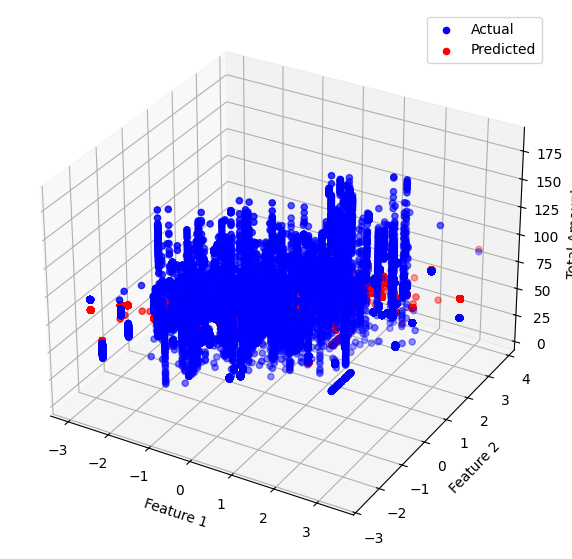

In [61]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual values
ax.scatter(x_test[:, 0], x_test[:, 1], y_test, color='blue', label='Actual')

# Predicted values
ax.scatter(x_test[:, 0], x_test[:, 1], y_pred_test_lasso, color='red', label='Predicted')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Total Amount')
ax.legend()
plt.show()

🔍 What it does:
This block creates a 3D scatter plot that visually compares your model's predicted values to the actual target values using the first two features of your dataset. The blue points represent the true outputs (y_test), and the red points represent the model’s predictions (y_pred_test_lasso), all plotted against the first and second features of your test data.

🧠 Why it matters:
This visualization helps you visually evaluate the performance of your model in three dimensions. When your target variable depends on multiple features, plotting predicted vs. actual values in 3D offers an intuitive way to see:

How well the model follows the shape of the actual data

Whether the predicted values align closely with the real values

If there are patterns, trends, or clusters where the model consistently under- or over-predicts

It’s especially helpful for communicating model behavior to others — visual patterns are easier to understand than raw numbers. However, this is best used when your dataset has at least two continuous input features, as it only uses the first two (x_test[:, 0] and x_test[:, 1]) for the horizontal axes.

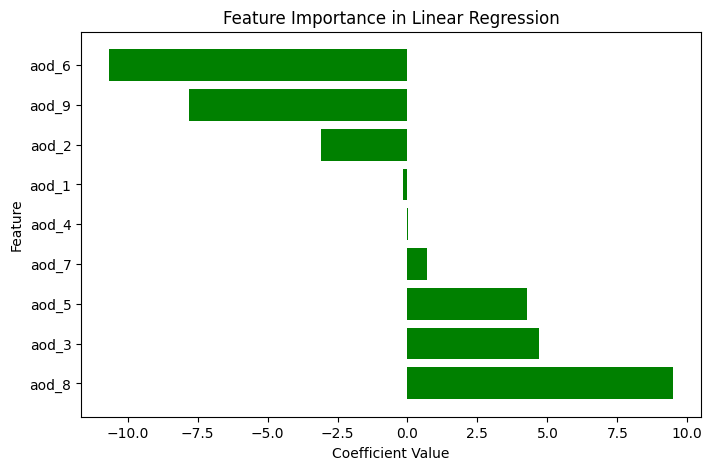

In [62]:
coefs = pd.DataFrame({'Feature': x.columns, 'Coefficient': best_lasso.coef_})
coefs = coefs.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(coefs['Feature'], coefs['Coefficient'], color='green')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Linear Regression')
plt.show()

🔍 What it does:
This cell creates a horizontal bar chart showing the coefficients of each feature in your final Lasso model. First, it builds a DataFrame that pairs feature names with their corresponding coefficients, then it sorts them by value (largest to smallest). Finally, it plots these as horizontal bars, where longer bars represent features with larger (absolute) impact on the prediction.

🧠 Why it matters:
This visualization is a quick and powerful way to interpret your model. Lasso not only predicts, but also helps identify which features matter most by shrinking irrelevant ones to zero. This chart shows:

Which features were kept (non-zero coefficients)

How strongly each remaining feature influences the outcome (positive or negative)

Which features were eliminated (they don’t appear at all or have zero-length bars)

You can use this to:

Understand what drives predictions

Simplify your feature set

Report meaningful insights to stakeholders

Spot any surprises — for instance, if an expectedly important feature has little weight

It also complements the earlier line where you printed how many features were kept or eliminated — this shows which ones.

# Polynomial Regression

In [63]:
from sklearn.preprocessing import PolynomialFeatures

🔍 What it does:
This line imports the PolynomialFeatures class from sklearn.preprocessing.

📌 Why it’s important:
Polynomial regression allows the model to learn more complex, non-linear relationships by transforming input features into polynomial combinations . This class handles the transformation.

In [64]:
poly = PolynomialFeatures()
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

🔍 What it does:

poly = PolynomialFeatures() creates an instance of the transformer using default settings

fit_transform(x_train) fits the transformer to the training data and transforms it by adding polynomial features.

The same transformation is applied to the test data.

📌 Why it’s important:
This expands the feature space, enabling linear models to fit non-linear trends. However, applying .fit_transform() to test data directly may cause data leakage. It’s better to use .transform(x_test) after fitting on x_train only.

In [65]:
x_train_poly.shape

(19763, 55)

🔍 What it does:
Returns the shape (number of rows and columns) of the polynomial-transformed training dataset.

📌 Why it’s important:
Helps you understand how many new features were generated after polynomial expansion. For example, if the original dataset had 5 features, this could now have 20+ depending on the degree.

In [66]:
poly_reg = LinearRegression()

🔍 What it does:
Initializes a new linear regression model.

📌 Why it’s important:
Although we are doing polynomial regression, the learning step is still done using linear regression, but on the expanded polynomial features. That’s why we reuse LinearRegression().

In [67]:
poly_reg.fit(x_train_poly, y_train)
y_pred_test_poly = poly_reg.predict(x_test_poly)
y_pred_train_poly = poly_reg.predict(x_train_poly)

🔍 What it does:

fit(...) trains the linear model using the polynomial features and target labels.

The model then predicts both test and training targets using predict(...).

📌 Why it’s important:
This is where the learning happens. The model tries to find the best coefficients to fit the non-linear relationships introduced by the polynomial features.

In [68]:
print(f"The Mean Squared Error of Test data with Polynomial Linear regression is {mean_squared_error(y_pred_test_poly, y_test)}")
print(f"The Mean Absolute Error of Test data with Polynomial Linear regression is {mean_absolute_error(y_pred_test_poly, y_test)}")
print(f"The Root Mean Squared Error of Test data with Polynomial Linear regression is {root_mean_squared_error(y_pred_test_poly, y_test)}")
print(f"\nThe R2 Score Test data with Linear Polynomial regression is {r2_score(y_pred_test_poly, y_test)}")

The Mean Squared Error of Test data with Polynomial Linear regression is 441.6798109856282
The Mean Absolute Error of Test data with Polynomial Linear regression is 16.33404040542033
The Root Mean Squared Error of Test data with Polynomial Linear regression is 21.016179742894003

The R2 Score Test data with Linear Polynomial regression is -4.1802315386905775


🔍 What it does:
Evaluates the model’s performance on the test set using:

MSE: Penalizes large errors more than small ones.

MAE: Gives average error magnitude.

RMSE: Easier to interpret than MSE due to same unit as target.

R² Score: Shows how well the model explains variance in the data.

📌 Why it’s important:
This tells you whether polynomial regression helped your model generalize better or not. If scores are significantly worse than training scores, it might indicate overfitting.

In [69]:
print(f"The Mean Squared Error of Train data with Linear regression is {mean_squared_error(y_pred_train_lr, y_train)}")
print(f"The Mean Absolute Error of Train data with Linear regression is {mean_absolute_error(y_pred_train_lr, y_train)}")
print(f"The Root Mean Squared Error of Train data with Linear regression is {root_mean_squared_error(y_pred_train_lr, y_train)}")
print(f"\nThe R2 Score Train data with Linear regression is {r2_score(y_pred_train_lr, y_train)}")

The Mean Squared Error of Train data with Linear regression is 494.72525733360897
The Mean Absolute Error of Train data with Linear regression is 17.443821307596085
The Root Mean Squared Error of Train data with Linear regression is 22.242420222035392

The R2 Score Train data with Linear regression is -18.34882245377549


🔍 What it does:
This evaluates the training performance of a linear regression model (without polynomial features), using the same metrics as above.

📌 Why it’s important:
This allows a direct comparison between a basic linear regression and the polynomial model. If polynomial regression performs better on test data (and not just on train data), then it's a beneficial upgrade. Otherwise, you might be overfitting or adding unnecessary complexity.

# K Nearest Neighbor Regressor

In [70]:
from sklearn.neighbors import KNeighborsRegressor

🔍 What it does:
This line imports the KNeighborsRegressor model from the sklearn.neighbors module.

📌 Why it's important:
KNeighborsRegressor is a non-parametric machine learning algorithm used for regression tasks. It works by finding the k closest data points (neighbors) in the training set to a new input and averaging their target values to make a prediction. Importing this class is the first step before using it to build, train, and evaluate your KNN model.

In [71]:
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

🔍 What it does:
Defines a dictionary called param_grid that lists the hyperparameters and their possible values for tuning the KNN model.

📌 Why it's important:
These are the options GridSearchCV will try in combination to find the best KNN model.

n_neighbors: Number of neighbors to use for prediction.

weights: How neighbors are weighted — either all equal (uniform) or closer ones get more weight (distance).

algorithm: The algorithm used to compute the nearest neighbors. Choices like 'kd_tree', 'brute', etc., can affect speed and performance depending on your data.

In [72]:
knn_reg = KNeighborsRegressor()

🔍 What it does:
Creates an instance of the KNeighborsRegressor model with default parameters.

📌 Why it's important:
This model will be passed into GridSearchCV, which will later fit and evaluate the model using different combinations of the hyperparameters defined in param_grid. At this point, no training happens—it's just the model setup.

In [73]:
grid_search = GridSearchCV(knn_reg, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 10, 15],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

🔍 What it does:

Initializes GridSearchCV to perform an exhaustive search over the parameter grid with 3-fold cross-validation.

Fits the grid search object on the training data to find the best KNN model.

📌 Why it's important:
Grid search systematically evaluates every combination of hyperparameters using cross-validation to identify the one that minimizes mean squared error (since you’re using neg_mean_squared_error as scoring).
This ensures you're not just guessing the best parameters—you're finding them based on performance on held-out data.

In [74]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'algorithm': 'brute', 'n_neighbors': 15, 'weights': 'distance'}


🔍 What it does:
Prints the best combination of hyperparameters found during the grid search.

📌 Why it's important:
This output tells you which values for n_neighbors, weights, and algorithm gave the best results. These will be used in the final model to make predictions. Without this step, you'd be unsure which settings produced the optimal model.

In [75]:
best_knn = KNeighborsRegressor(algorithm='brute', n_neighbors=15, weights='distance')

🔍 What it does:
Creates a new KNeighborsRegressor object using the best parameters identified from the grid search.

📌 Why it's important:
You’re manually configuring the model with the optimal settings for reproducibility and clarity. Instead of reusing grid_search.best_estimator_, you explicitly define the model again using the best found configuration. This is useful for consistency and for re-training on the entire training set.

In [76]:
best_knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='brute', n_neighbors=15, weights='distance')


🔍 What it does:
Trains the KNN model with the best-found hyperparameters on the training data.

📌 Why it's important:
This step actually fits the final model using the entire training data, preparing it to make predictions on unseen test data. Without training, the model would have no knowledge of the data to base predictions on.

In [77]:
y_pred_test_knn = best_knn.predict(x_test)
y_pred_train_knn = best_knn.predict(x_train)

🔍 What it does:
Makes predictions using the trained model:

y_pred_test_knn holds predictions for the test set.

y_pred_train_knn holds predictions for the training set.

📌 Why it's important:
This is the model's way of applying what it learned to both known and unseen data. The training predictions help you evaluate whether the model overfit, while the test predictions help you assess real-world performance.

In [78]:
print(f"The Mean Squared Error of Test data with KNN Regression is {mean_squared_error(y_pred_test_knn, y_test)}")
print(f"The Mean Absolute Error of Test data with KNN Regression is {mean_absolute_error(y_pred_test_knn, y_test)}")
print(f"The Root Mean Squared Error of Test data with KNN Regression is {root_mean_squared_error(y_pred_test_knn, y_test)}")
print(f"\nThe R2 Score Test data with KNN Regression is {r2_score(y_pred_test_knn, y_test)}")

The Mean Squared Error of Test data with KNN Regression is 53.127643837283095
The Mean Absolute Error of Test data with KNN Regression is 2.2772700219324733
The Root Mean Squared Error of Test data with KNN Regression is 7.288871232041563

The R2 Score Test data with KNN Regression is 0.8890598866062384


🔍 What it does:
Prints four performance metrics for the test data:

MSE: Average squared difference between predicted and true values.

MAE: Average absolute error.

RMSE: Square root of MSE, giving error in original units.

R² Score: How much variance in the target is explained by the model.

📌 Why it's important:
These metrics give a complete picture of how well your KNN model performs on new data. A low RMSE and high R² score indicate good generalization. This step helps you assess whether the model is viable in real-world scenarios

In [79]:
print(f"The Mean Squared Error of Train data with KNN Regression is {mean_squared_error(y_pred_train_knn, y_train)}")
print(f"The Mean Absolute Error of Train data with KNN Regression is {mean_absolute_error(y_pred_train_knn, y_train)}")
print(f"The Root Mean Squared Error of Train data with KNN Regression is {root_mean_squared_error(y_pred_train_knn, y_train)}")
print(f"\nThe R2 Score Train data with KNN Regression is {r2_score(y_pred_train_knn, y_train)}")

The Mean Squared Error of Train data with KNN Regression is 39.69508403549381
The Mean Absolute Error of Train data with KNN Regression is 1.9865257728812833
The Root Mean Squared Error of Train data with KNN Regression is 6.300403481960009

The R2 Score Train data with KNN Regression is 0.917676541025406


🔍 What it does:
Prints the same four evaluation metrics, but for the training data instead of the test data.

📌 Why it's important:
This helps you compare training and test performance. If the model performs much better on training data than test data, it's overfitting. If both are similar, the model is well-generalized. Analyzing both sets of metrics is essential to validate the model’s reliability.

# Decision Tree Regressor

In [80]:
from sklearn.tree import DecisionTreeRegressor

🔍 What it does:
Imports the DecisionTreeRegressor class from scikit-learn. This is a machine learning model used for predicting continuous values by learning decision rules from features.

📌 Why it’s important:
You need to import the model before using it. Decision trees are intuitive and can capture complex patterns in your data without requiring feature scaling.

In [81]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
}

🔍 What it does:
Creates a dictionary (param_grid) that defines different combinations of hyperparameters for the decision tree.

📌 Why it’s important:
You’ll use this in a grid search to find the best-performing combination. Tuning these parameters helps prevent overfitting and underfitting.

In [82]:
dt_reg = DecisionTreeRegressor()

🔍 What it does:
Creates an instance of the decision tree model with default settings.

📌 Why it’s important:
This untrained model will be used in the grid search to try different configurations and find the best one.

In [83]:
grid_search = GridSearchCV(dt_reg, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

🔍 What it does:
Performs an exhaustive search over the param_grid with 3-fold cross-validation to find the best combination of parameters. The model is evaluated using negative mean squared error.

📌 Why it’s important:
This step helps you systematically find the model configuration that gives the best performance on unseen data, improving accuracy and generalization.

In [84]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}


🔍 What it does:
Prints the set of hyperparameters that performed best during the grid search.

📌 Why it’s important:
Knowing the best parameters lets you retrain your model with optimal settings, improving performance.

In [85]:
best_dt_regressor = DecisionTreeRegressor(max_depth=None, max_features='sqrt', min_samples_leaf=2, min_samples_split=2)

🔍 What it does:
Initializes a new decision tree regressor with the best parameters found in the grid search.

📌 Why it’s important:
You’re creating a clean model configured with optimal hyperparameters, ready for final training and evaluation.

In [86]:
best_dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_features='sqrt', min_samples_leaf=2)

🔍 What it does:
Trains the decision tree model using the training data.

📌 Why it’s important:
This is where the model actually learns patterns in the data to make future predictions.

In [87]:
y_pred_test_dt = best_dt_regressor.predict(x_test)
y_pred_train_dt = best_dt_regressor.predict(x_train)

🔍 What it does:
Uses the trained model to predict target values for both the test set and the training set.

📌 Why it’s important:
You need predictions to evaluate how well the model performs on both seen and unseen data — crucial for checking overfitting.

In [88]:
print(f"The Mean Squared Error of Test data with Decision Tree regression is {mean_squared_error(y_pred_test_dt, y_test)}")
print(f"The Mean Absolute Error of Test data with Decision Tree regression is {mean_absolute_error(y_pred_test_dt, y_test)}")
print(f"The Root Mean Squared Error of Test data with Decision Tree regression is {root_mean_squared_error(y_pred_test_dt, y_test)}")
print(f"\nThe R2 Score Test data with Decision Tree regression is {r2_score(y_pred_test_dt, y_test)}")

The Mean Squared Error of Test data with Decision Tree regression is 54.7854073965066
The Mean Absolute Error of Test data with Decision Tree regression is 2.3274024021960145
The Root Mean Squared Error of Test data with Decision Tree regression is 7.40171651689705

The R2 Score Test data with Decision Tree regression is 0.8854713589489409


🔍 What it does:
Prints four performance metrics for the test data:

MSE: Average squared difference between predictions and actual values.

MAE: Average absolute error.

RMSE: Square root of MSE.

R² Score: How much variance in the target is explained by the model.

📌 Why it’s important:
These metrics give you a complete picture of the model’s performance on unseen data. A low RMSE and high R² suggest the model generalizes well

In [89]:
print(f"The Mean Squared Error of Train data with Decision Tree regression is {mean_squared_error(y_pred_train_dt, y_train)}")
print(f"The Mean Absolute Error of Train data with Decision Tree regression is {mean_absolute_error(y_pred_train_dt, y_train)}")
print(f"The Root Mean Squared Error of Train data with Decision Tree regression is {root_mean_squared_error(y_pred_train_dt, y_train)}")
print(f"\nThe R2 Score Train data with Decision Tree regression is {r2_score(y_pred_train_dt, y_train)}")

The Mean Squared Error of Train data with Decision Tree regression is 42.26597319440755
The Mean Absolute Error of Train data with Decision Tree regression is 2.0833879153517603
The Root Mean Squared Error of Train data with Decision Tree regression is 6.501228591151641

The R2 Score Train data with Decision Tree regression is 0.9115826480191135


🔍 What it does:
Prints the same four metrics, but this time for the training data.

📌 Why it’s important:
Comparing training and test metrics helps you detect overfitting. If the training scores are much better than test scores, the model may not generalize well.

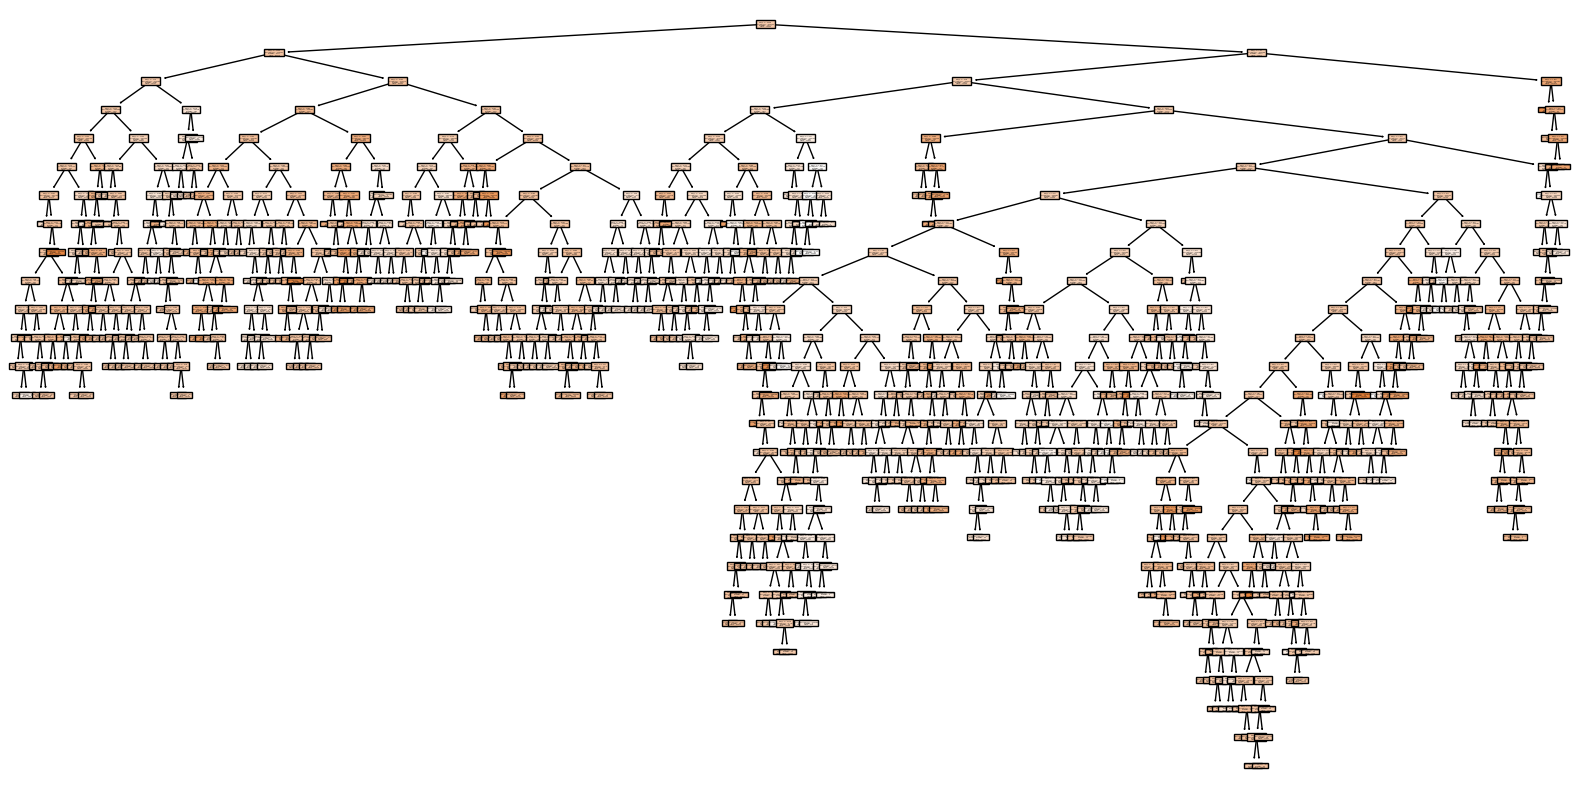

In [90]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(best_dt_regressor, filled=True, feature_names=df.columns)
plt.show()

🔍 What it does:
Draws a visual representation of the trained decision tree. Each box shows a decision split, and boxes are color-coded by output value.

📌 Why it’s important:
This helps you interpret how the model makes predictions — it’s one of the biggest strengths of decision trees: transparency and explainability.

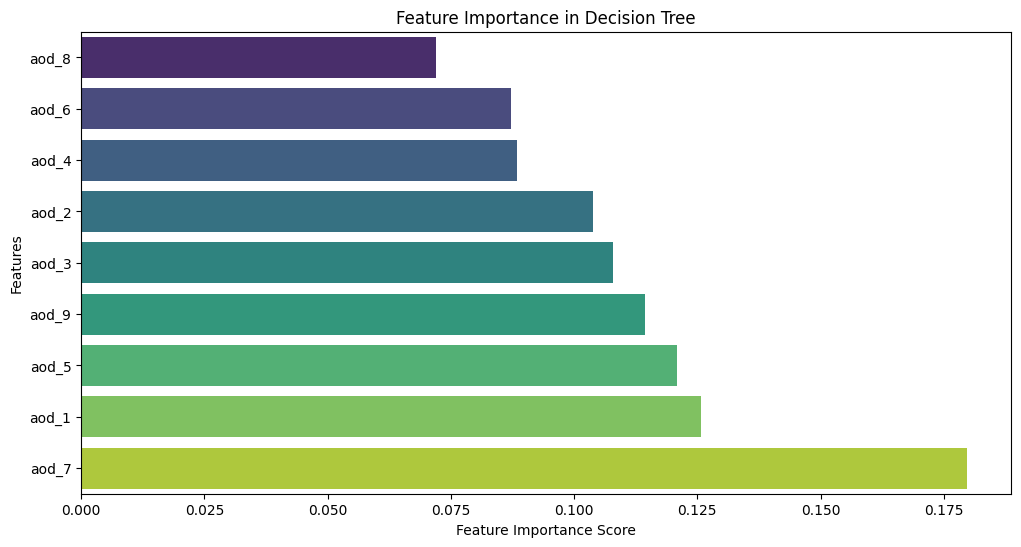

In [91]:
feature_importance = best_dt_regressor.feature_importances_
features = df_subset.columns

sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance[sorted_idx], y=features[sorted_idx], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.show()


# SVR(Support Vector Regression)

In [92]:
from sklearn.svm import SVR

🔍 What it does: Imports the SVR (Support Vector Regression) class from the sklearn.svm module.

📌 Why it's important: SVR is a powerful regression algorithm based on support vector machines. It's especially useful when you want to model non-linear relationships and control overfitting using hyperparameters like C and epsilon.

In [93]:
svr = SVR()

🔍 What it does: Creates an instance of the SVR model with default parameters.

📌 Why it's important: This step initializes the SVR model before training. You can later customize this object with different kernel types or regularization strengths if needed.

In [94]:
svr.fit(x_train, y_train)

SVR()

🔍 What it does: Fits (trains) the SVR model on the training data (x_train, y_train).

📌 Why it's important: This is the core training step where the model learns the patterns in the input features and how they relate to the target variable. SVR tries to fit the data within a certain margin (epsilon) and uses support vectors to define the regression line.

In [95]:
y_pred_train_svr = svr.predict(x_train)

🔍 What it does: Predicts the target values for the training data using the trained SVR model.

📌 Why it's important: Helps you evaluate how well the model performs on the data it was trained on. Useful for detecting underfitting or overfitting when compared to test performance.

In [96]:
y_pred_test_svr= svr.predict(x_test)

🔍 What it does: Predicts the target values for the test data using the trained SVR model.

📌 Why it's important: This is the key step in evaluating your model's generalization ability—how well it performs on unseen data.

In [97]:
print(f"The Mean Squared Error of Test data with svr is {mean_squared_error(y_pred_test_svr, y_test)}")
print(f"The Mean Absolute Error of Test data with svr is {mean_absolute_error(y_pred_test_svr, y_test)}")
print(f"The Root Mean Squared Error of Test data with svr is {root_mean_squared_error(y_pred_test_svr, y_test)}")
print(f"\nThe R2 Score Test data with svr is {r2_score(y_pred_test_svr, y_test)}")

The Mean Squared Error of Test data with svr is 469.8117889924536
The Mean Absolute Error of Test data with svr is 15.87537133624986
The Root Mean Squared Error of Test data with svr is 21.675142190824346

The R2 Score Test data with svr is -15.034520588434422


🔍 What it does: Calculates and prints four common evaluation metrics for the test set:

MSE: Penalizes large errors.

MAE: Gives a direct average of absolute errors.

RMSE: Square root of MSE; interpretable in the same units as target variable.

R² Score: Shows the proportion of variance the model explains.

📌 Why it's important: These metrics tell you how accurately your SVR model predicts on new, unseen data. Poor performance here could indicate underfitting or overfitting.

In [98]:
print(f"The Mean Squared Error of Train data with svr  is {mean_squared_error(y_pred_train_svr, y_train)}")
print(f"The Mean Absolute Error of Train data with svr  is {mean_absolute_error(y_pred_train_svr, y_train)}")
print(f"The Root Mean Squared Error of Train data with svr  is {root_mean_squared_error(y_pred_train_svr, y_train)}")
print(f"\nThe R2 Score Train data with svr  is {r2_score(y_pred_train_svr, y_train)}")

The Mean Squared Error of Train data with svr  is 470.0708146024232
The Mean Absolute Error of Train data with svr  is 15.867731577792355
The Root Mean Squared Error of Train data with svr  is 21.68111654418248

The R2 Score Train data with svr  is -15.3362711578533


🔍 What it does: Calculates and prints four common evaluation metrics for the test set:

MSE: Penalizes large errors.

MAE: Gives a direct average of absolute errors.

RMSE: Square root of MSE; interpretable in the same units as target variable.

R² Score: Shows the proportion of variance the model explains.

📌 Why it's important: These metrics tell you how accurately your SVR model predicts on new, unseen data. Poor performance here could indicate underfitting or overfitting.

# Random Forest Regressor

In [99]:
from sklearn.ensemble import RandomForestRegressor

🔍 What it does:
This line imports the RandomForestRegressor class from Scikit-learn's ensemble module. Random Forest is an ensemble learning method that builds multiple decision trees and averages their outputs to improve prediction accuracy and control overfitting.

📌 Why it’s important:
Random Forest often performs better than a single decision tree by reducing variance. It’s a powerful and commonly used model in regression tasks.

In [100]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

🔍 What it does:
This creates a dictionary of hyperparameters and their possible values to be tested during Grid Search. These parameters control the size, shape, and behavior of the Random Forest model.

📌 Why it’s important:
Tuning these parameters helps you find the best combination that gives the highest performance. This step is key to building an optimized model.

In [101]:
rfr = RandomForestRegressor()

🔍 What it does:
Initializes a basic Random Forest Regressor with default parameters. This will later be used in the grid search for hyperparameter tuning.

📌 Why it’s important:
You need an instance of the model to use in grid search. This is the base model that will be tested with different combinations of the hyperparameters you defined.

In [102]:
grid_search = GridSearchCV(rfr, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

🔍 What it does:
Sets up GridSearchCV, which will try every combination of the hyperparameters defined in param_grid, using 3-fold cross-validation. n_jobs=-1 allows it to use all available CPU cores for faster computation.

📌 Why it’s important:
This step automates the model tuning process and helps you find the combination of parameters that minimizes the prediction error (MSE in this case).

In [103]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

🔍 What it does:
Starts the grid search process. It fits multiple versions of the Random Forest model with different parameter combinations to the training data.

📌 Why it’s important:
This is the actual training phase for all the tested models. It finds out which set of parameters works best on the training data by comparing cross-validated scores.

In [104]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


🔍 What it does:
Prints the best set of hyperparameters found during the grid search.

📌 Why it’s important:
Once tuning is done, you want to know which combination of settings gave the lowest prediction error. You’ll use this combination to build your final model.

In [105]:
best_rfr = RandomForestRegressor()

🔍 What it does:
Creates a new Random Forest Regressor. Note: This should ideally use the best parameters from grid search (e.g., RandomForestRegressor(**grid_search.best_params_)), but here it’s just the default model.

📌 Why it’s important:
This is the model that will be trained and evaluated on the data. If you’re not using the best parameters here, you may not get optimal results.

In [106]:
best_rfr.fit(x_train,y_train)

RandomForestRegressor()

🔍 What it does:
Fits the Random Forest model to the training data.

📌 Why it’s important:
This is the main training step. The model learns the relationships in the data so it can later make predictions.

In [107]:
y_pred_test_rfr= best_rfr.predict(x_test)

🔍 What it does:
Generates predictions on the test dataset using the trained Random Forest model.

📌 Why it’s important:
This gives you a way to evaluate how well the model performs on unseen data, which is critical to understanding real-world performance.

In [108]:
y_pred_train_rfr= best_rfr.predict(x_train)

🔍 What it does:
Generates predictions on the training dataset using the same model.

📌 Why it’s important:
Helps you compare training vs. testing performance. If training error is low and test error is high, it’s a sign of overfitting.

In [109]:
print(f"The Mean Squared Error of Test data with rfr is {mean_squared_error(y_pred_test_rfr, y_test)}")
print(f"The Mean Absolute Error of Test data with rfr is {mean_absolute_error(y_pred_test_rfr, y_test)}")
print(f"The Root Mean Squared Error of Test data with rfr is {root_mean_squared_error(y_pred_test_rfr, y_test)}")
print(f"\nThe R2 Score Test data with rfr is {r2_score(y_pred_test_rfr, y_test)}")

The Mean Squared Error of Test data with rfr is 51.5236023023747
The Mean Absolute Error of Test data with rfr is 2.2669923549856423
The Root Mean Squared Error of Test data with rfr is 7.17799430916288

The R2 Score Test data with rfr is 0.8915999378148077


🔍 What it does:
Prints four performance metrics for the test data:

MSE: Average squared error between predicted and actual values

MAE: Average absolute error

RMSE: Square root of MSE

R² Score: Proportion of variance explained by the model

📌 Why it’s important:
These metrics tell you how accurate the model is when applied to new, unseen data. High R² and low errors suggest strong predictive performance.

In [110]:
print(f"The Mean Squared Error of Train data with rfr  is {mean_squared_error(y_pred_train_rfr, y_train)}")
print(f"The Mean Absolute Error of Train data with rfr  is {mean_absolute_error(y_pred_train_rfr, y_train)}")
print(f"The Root Mean Squared Error of Train data with rfr  is {root_mean_squared_error(y_pred_train_rfr, y_train)}")
print(f"\nThe R2 Score Train data with rfr  is {r2_score(y_pred_train_rfr, y_train)}")

The Mean Squared Error of Train data with rfr  is 39.9702371782103
The Mean Absolute Error of Train data with rfr  is 2.0235647830897605
The Root Mean Squared Error of Train data with rfr  is 6.3222019248209955

The R2 Score Train data with rfr  is 0.9162430411769426


🔍 What it does:
Prints the same four performance metrics for the training data.

📌 Why it’s important:
Allows you to compare training performance to testing performance. If training error is much lower than test error, it may indicate overfitting.

# MLP

In [111]:
from sklearn.neural_network import MLPRegressor

🔍 What it does:
This line imports the MLPRegressor class from scikit-learn, which is a machine learning model that uses artificial neural networks for regression tasks.

📌 Why it's important:
MLPRegressor allows you to capture complex nonlinear relationships between input features and the target variable. It's especially useful when linear models (like Lasso or Ridge) don’t perform well due to nonlinearity in the data.

In [112]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'lbfgs', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

🔍 What it does:
Defines a dictionary called param_grid, listing different combinations of hyperparameters to try during model tuning.

📌 Why it's important:
These hyperparameters directly affect how the neural network learns:

hidden_layer_sizes: defines the structure of the network (how many layers and how many neurons).

activation: determines the nonlinearity function used in the neurons.

solver: optimization algorithm used for weight updates.

alpha: regularization term to prevent overfitting.

learning_rate: how the learning rate is adjusted during training.

Exploring these combinations with grid search helps find the best-performing model setup.

In [113]:
mlp = MLPRegressor()

🔍 What it does:
Creates a base MLPRegressor model instance with default settings.

📌 Why it's important:
This is the model that will be passed to the grid search, which will automatically test different versions of this model with the parameters listed in param_grid.

In [114]:
grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

🔍 What it does:
Creates a GridSearchCV object to search through all combinations of parameters in param_grid, using 3-fold cross-validation.

📌 Why it's important:

Automates the hyperparameter tuning process.

cv=3 means it splits the training data into 3 parts to validate performance.

scoring='neg_mean_squared_error' ensures models are ranked by how low their mean squared error is.

n_jobs=-1 allows parallel processing using all CPU cores for faster execution.

This step helps select the most accurate version of the MLP model.

🔍 What it does:
Prints out the best combination of hyperparameters found during the grid search.

📌 Why it's important:
Gives you direct insight into which model structure and settings produced the lowest error — these are the values you’ll want to use when training the final model.

In [116]:
best_mlp= MLPRegressor()

🔍 What it does:
Creates a new MLP model instance, again with default parameters.

📌 Why it's important:
However, this line might be missing a key improvement — it does not use the best parameters found in the grid search. Ideally, you would do something like:


best_mlp = MLPRegressor(**grid_search.best_params_)
Without this correction, you're not truly using the “best” version found. Let me know if you'd like help fixing that.

In [117]:
best_mlp.fit(x_train,y_train)

MLPRegressor()

🔍 What it does:
Trains the best_mlp model on the training data (x_train and y_train).

📌 Why it's important:
This is the actual learning phase, where the model adjusts its internal weights using backpropagation and the solver you selected. The result is a trained neural network ready to make predictions.

In [118]:
y_pred_test_mlp= best_mlp.predict(x_test)

🔍 What it does:
Uses the trained MLP model to make predictions on the test set features x_test.

📌 Why it's important:
This tests how well the model generalizes to unseen data. The predictions will be compared to the actual test targets to evaluate model performance.



In [119]:
y_pred_train_mlp= best_mlp.predict(x_train)

🔍 What it does:
Uses the trained model to predict outcomes on the training data.

📌 Why it's important:
This is useful for comparing performance between training and test data. If training performance is much better than test, your model may be overfitting.

In [120]:
print(f"The Mean Squared Error of Test data with mlp is {mean_squared_error(y_pred_test_mlp, y_test)}")
print(f"The Mean Absolute Error of Test data with mlp is {mean_absolute_error(y_pred_test_mlp, y_test)}")
print(f"The Root Mean Squared Error of Test data with mlp is {root_mean_squared_error(y_pred_test_mlp, y_test)}")
print(f"\nThe R2 Score Test data with mlp is {r2_score(y_pred_test_mlp, y_test)}")

The Mean Squared Error of Test data with mlp is 379.78437375062856
The Mean Absolute Error of Test data with mlp is 14.86839852937446
The Root Mean Squared Error of Test data with mlp is 19.488057208214176

The R2 Score Test data with mlp is -2.6371999364970775


🔍 What it does:
Prints four key evaluation metrics for test data:

Mean Squared Error (MSE)

Mean Absolute Error (MAE)

Root Mean Squared Error (RMSE)

R² score

📌 Why it's important:
Shows how well the model performs on new data. Helps assess accuracy and generalization. Lower error values and a higher R² are ideal.

In [121]:
print(f"The Mean Squared Error of Train data with mlp  is {mean_squared_error(y_pred_train_mlp, y_train)}")
print(f"The Mean Absolute Error of Train data with mlp  is {mean_absolute_error(y_pred_train_mlp, y_train)}")
print(f"The Root Mean Squared Error of Train data with mlp  is {root_mean_squared_error(y_pred_train_mlp, y_train)}")
print(f"\nThe R2 Score Train data with mlp  is {r2_score(y_pred_train_mlp, y_train)}")

The Mean Squared Error of Train data with mlp  is 377.8242333408355
The Mean Absolute Error of Train data with mlp  is 14.825282585174204
The Root Mean Squared Error of Train data with mlp  is 19.437701338914422

The R2 Score Train data with mlp  is -2.6609690200806186


🔍 What it does:
Prints the same four evaluation metrics, but this time for the training data.

📌 Why it's important:
Allows direct comparison with test data metrics. A large performance gap (good training, bad test) means overfitting. If both are poor, it’s underfitting. Balanced, good results on both sets mean the model is well-tuned.